Perform Exploratory Data Analysis (EDA) on the provided dataset to gain insights into the financial allocations and expenditures across various ministries and schemes for the fiscal years 2021-2022, 2022-2023, and 2023-2024. The objectives are to:

* Identify trends and patterns in revenue and capital expenditures.
* Compare budget estimates with actual expenditures.
* Highlight significant variances between budget estimates and revised estimates.
* Determine which ministries and schemes have the highest and lowest allocations and expenditures.
* Analyze the proportion of capital versus revenue expenditures.
* Provide recommendations based on the findings to inform future budget planning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('MRF_10A_Union_Budget.csv')
data.head()

Category Sl.No.                            Ministry/Department  \
0  Demand No. 1    NaN  Department of Agriculture and Farmers Welfare   
1  Demand No. 1      1  Department of Agriculture and Farmers Welfare   
2  Demand No. 1      2  Department of Agriculture and Farmers Welfare   
3  Demand No. 1      3  Department of Agriculture and Farmers Welfare   
4  Demand No. 1      4  Department of Agriculture and Farmers Welfare   

                                              Scheme  \
0                                              Total   
1                       Rashtriya Krishi Vikas Yojna   
2  Market Intervention Scheme and Price Support S...   
3                     National Food Security Mission   
4  Organic Value Chain Development for North East...   

   Actuals 2021-2022 Revenue  Actuals 2021-2022 Capital  \
0                   12790.24                        0.0   
1                       0.00                        0.0   
2                       0.00                        0.0   
3                     106.19                        0.0   
4                       4.33                        0.0   

   Actuals 2021-2022 Total  Budget Estimates 2022-2023 Revenue  \
0                 12790.24                            20472.12   
1                     0.00                             1737.49   
2                     0.00                              251.70   
3                   106.19                                0.00   
4                     4.33                                0.00   

   Budget Estimates 2022-2023 Capital  Budget Estimates 2022-2023 Total  \
0                                 0.0                          20472.12   
1                                 0.0                           1737.49   
2                                 0.0                            251.70   
3                                 0.0                              0.00   
4                                 0.0                              0.00   

   Revised Estimates2022-2023 Revenue  Revised Estimates 2022-2023 Capital  \
0                            18165.61                                  0.0   
1                             1176.09                                  0.0   
2                              244.90                                  0.0   
3                                0.00                                  0.0   
4                                0.00                                  0.0   

   Revised Estimates2022-2023 Total  Budget Estimates2023-2024 Revenue  \
0                          18165.61                           18894.59   
1                           1176.09                            1307.79   
2                            244.90                               0.00   
3                              0.00                               0.00   
4                              0.00                               0.00   

   Budget Estimates2023-2024 Capital  Budget Estimates2023-2024 Total  
0                                0.0                         18894.59  
1                                0.0                          1307.79  
2                                0.0                             0.00  
3                                0.0                             0.00  
4                                0.0                             0.00

In [3]:
data.shape

(496, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Category                             496 non-null    object 
 1   Sl.No.                               433 non-null    object 
 2   Ministry/Department                  496 non-null    object 
 3   Scheme                               496 non-null    object 
 4   Actuals 2021-2022 Revenue            441 non-null    float64
 5   Actuals 2021-2022 Capital            436 non-null    float64
 6   Actuals 2021-2022 Total              441 non-null    float64
 7   Budget Estimates 2022-2023 Revenue   441 non-null    float64
 8   Budget Estimates 2022-2023 Capital   438 non-null    float64
 9   Budget Estimates 2022-2023 Total     441 non-null    float64
 10  Revised Estimates2022-2023 Revenue   441 non-null    float64
 11  Revised Estimates 2022-2023 Capi

In [5]:
data.describe()

Actuals 2021-2022 Revenue  Actuals 2021-2022 Capital  \
count                 441.000000                 436.000000   
mean                  872.719342                   1.034518   
std                  6229.041528                  10.217828   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     8.150000                   0.000000   
75%                    68.400000                   0.000000   
max                121463.440000                 150.350000   

       Actuals 2021-2022 Total  Budget Estimates 2022-2023 Revenue  \
count               441.000000                          441.000000   
mean                873.742132                         1022.109683   
std                6235.803486                         7208.407455   
min                   0.000000                            0.000000   
25%                   0.000000                            0.000000   
50%                   9.000000                           18.000000   
75%                  68.910000                          109.000000   
max              121613.790000                       142115.340000   

       Budget Estimates 2022-2023 Capital  Budget Estimates 2022-2023 Total  \
count                          438.000000                        441.000000   
mean                             1.554977                       1023.654082   
std                             14.586365                       7218.878223   
min                              0.000000                          0.000000   
25%                              0.000000                          0.000000   
50%                              0.000000                         18.270000   
75%                              0.000000                        109.000000   
max                            227.020000                     142342.360000   

       Revised Estimates2022-2023 Revenue  \
count                          441.000000   
mean                          1112.760544   
std                           7772.629423   
min                              0.000000   
25%                              0.000000   
50%                             13.000000   
75%                            108.000000   
max                         152352.270000   

       Revised Estimates 2022-2023 Capital  Revised Estimates2022-2023 Total  \
count                           437.000000                        441.000000   
mean                              1.730114                       1114.474966   
std                              15.552280                       7783.888063   
min                               0.000000                          0.000000   
25%                               0.000000                          0.000000   
50%                               0.000000                         14.270000   
75%                               0.000000                        109.000000   
max                             252.020000                     152604.290000   

       Budget Estimates2023-2024 Revenue  Budget Estimates2023-2024 Capital  \
count                         441.000000                         436.000000   
mean                         1131.821542                           7.734862   
std                          8014.355773                          62.760205   
min                             0.000000                           0.000000   
25%                             0.000000                           0.000000   
50%                            10.000000                           0.000000   
75%                           107.000000                           0.000000   
max                        158140.420000                         985.800000   

       Budget Estimates2023-2024 Total  
count                       441.000000  
mean                       1139.468707  
std                        8058.089982  
min                           0.000000  
25%                           0.000000  
50%        

# Data Cleaning

In [6]:
data1=data.copy()

In [7]:
total_data=data[data['Scheme'].str.lower().str.contains('total')]
display(total_data)

data1=data[~data['Scheme'].str.lower().str.contains('total')]
display(data1.head(20))

Category       Sl.No.  \
0      Demand No. 1          NaN   
39     Demand No. 1          NaN   
42     Demand No. 2          NaN   
53     Demand No. 4          NaN   
62     Demand No. 6          NaN   
..              ...          ...   
461   Demand No. 98          NaN   
476  Demand No. 101          NaN   
480  Demand No. 102          NaN   
493  Demand No. 102          NaN   
495     Grand Total  Grand Total   

                                   Ministry/Department  \
0        Department of Agriculture and Farmers Welfare   
39       Department of Agriculture and Farmers Welfare   
42   Department of Agricultural Research and Education   
53                                   Ministry of Ayush   
62                           Department of Fertilisers   
..                                                 ...   
461                               Ministry of Textiles   
476            Ministry of Women and Child Development   
480               Ministry of Youth Affairs and Sports   
493               Ministry of Youth Affairs and Sports   
495                                        Grand Total   

                                            Scheme  Actuals 2021-2022 Revenue  \
0                                            Total                   12790.24   
39                       Total-Krishionnati Yojana                       0.00   
42                                           Total                     190.00   
53                                           Total                      68.11   
62                                           Total                   13092.43   
..                                             ...                        ...   
461                                          Total                     216.30   
476                                          Total                    4481.18   
480                                          Total                     181.68   
493  Total-Rashtriya Yuva Sashaktikaran Karyakaram                       0.00   
495                                    Grand Total                  121463.44   

     Actuals 2021-2022 Capital  Actuals 2021-2022 Total  \
0                         0.00                 12790.24   
39                        0.00                     0.00   
42                        0.00                   190.00   
53                        0.00                    68.11   
62                        0.00                 13092.43   
..                         ...                      ...   
461                       0.00                   216.30   
476                       0.00                  4481.18   
480                       0.00                   181.68   
493                       0.00                     0.00   
495                     150.35                121613.79   

     Budget Estimates 2022-2023 Revenue  Budget Estimates 2022-2023 Capital  \
0                              20472.12                                0.00   
39                              1162.53                                0.00   
42                               165.70                                0.00   
53                                95.00                                0.00   
62                              9062.50                                0.00   
..                                  ...                                 ...   
461                              223.98                                0.00   
476                             4988.00                                0.00   
480                              304.55                                0.00   
493                                0.00                                0.00   
495                           142115.34                              227.02   

     Budget Estimates 2022-2023 Total  Revised Estimates2022-2023 Revenue  \
0                            20472.12                            18165.61   
39                            1162.53                              803.15   
42                 

Category Sl.No.                            Ministry/Department  \
1   Demand No. 1      1  Department of Agriculture and Farmers Welfare   
2   Demand No. 1      2  Department of Agriculture and Farmers Welfare   
3   Demand No. 1      3  Department of Agriculture and Farmers Welfare   
4   Demand No. 1      4  Department of Agriculture and Farmers Welfare   
5   Demand No. 1      5  Department of Agriculture and Farmers Welfare   
6   Demand No. 1      6  Department of Agriculture and Farmers Welfare   
7   Demand No. 1      7  Department of Agriculture and Farmers Welfare   
8   Demand No. 1      8  Department of Agriculture and Farmers Welfare   
9   Demand No. 1      9  Department of Agriculture and Farmers Welfare   
10  Demand No. 1     10  Department of Agriculture and Farmers Welfare   
11  Demand No. 1     11  Department of Agriculture and Farmers Welfare   
12  Demand No. 1     12  Department of Agriculture and Farmers Welfare   
13  Demand No. 1     13  Department of Agriculture and Farmers Welfare   
14  Demand No. 1     14  Department of Agriculture and Farmers Welfare   
15  Demand No. 1     15  Department of Agriculture and Farmers Welfare   
16  Demand No. 1  15.01  Department of Agriculture and Farmers Welfare   
17  Demand No. 1     16  Department of Agriculture and Farmers Welfare   
18  Demand No. 1     17  Department of Agriculture and Farmers Welfare   
19  Demand No. 1     18  Department of Agriculture and Farmers Welfare   
20  Demand No. 1     19  Department of Agriculture and Farmers Welfare   

                                               Scheme  \
1                        Rashtriya Krishi Vikas Yojna   
2   Market Intervention Scheme and Price Support S...   
3                      National Food Security Mission   
4   Organic Value Chain Development for North East...   
5       National Project on Soil Health and Fertility   
6         Rainfed Area Development and Climate Change   
7                    Paramparagat Krishi Vikas Yojana   
8                  National Project on Agro- Forestry   
9                    National Mission on Horticulture   
10         Sub- Mission on Seed and Planting Material   
11             Sub - Mission on Agriculture Extension   
12                             Information Technology   
13          Sub- Mission on Agriculture Mechanisation   
14      Integrated Scheme on Agricultural Cooperation   
15                              Agriculture Marketing   
16         Integrated Scheme on Agriculture Marketing   
17  Promotion of Agricultural Mechanization for in...   
18              Agriculture Infrastructure Fund (AIF)   
19       Pradhan Mantri Kisan Samman Nidhi (PM-Kisan)   
20  Formation and Promotion of 10,000 Farmer Produ...   

    Actuals 2021-2022 Revenue  Actuals 2021-2022 Capital  \
1                        0.00                        0.0   
2                        0.00                        0.0   
3                      106.19                        0.0   
4                        4.33                        0.0   
5                        0.03                        0.0   
6                       13.78                        0.0   
7                       14.96                        0.0   
8                        1.00                        0.0   
9                      108.53                        0.0   
10                       5.77                        0.0   
11                     125.15                        0.0   
12                       2.86                        0.0   
13                     139.34                        0.0   
14                      56.68                        0.0   
15                        NaN                        NaN   
16                       2.32                        0.0   
17                     116.20                        0.0   
18                       0.37                        0.0   
19                    8201.08                        0.0   
20                       0.00                        0.

In [8]:
data1.isnull().sum()

Category                                0
Sl.No.                                  0
Ministry/Department                     0
Scheme                                  0
Actuals 2021-2022 Revenue              55
Actuals 2021-2022 Capital              55
Actuals 2021-2022 Total                55
Budget Estimates 2022-2023 Revenue     55
Budget Estimates 2022-2023 Capital     55
Budget Estimates 2022-2023 Total       55
Revised Estimates2022-2023 Revenue     55
Revised Estimates 2022-2023 Capital    55
Revised Estimates2022-2023 Total       55
Budget Estimates2023-2024 Revenue      55
Budget Estimates2023-2024 Capital      55
Budget Estimates2023-2024 Total        55
dtype: int64

In [9]:
data1.dropna(axis=0, inplace= True)

In [10]:
64+377+55

496

In [11]:
data1.isnull().sum()

Category                               0
Sl.No.                                 0
Ministry/Department                    0
Scheme                                 0
Actuals 2021-2022 Revenue              0
Actuals 2021-2022 Capital              0
Actuals 2021-2022 Total                0
Budget Estimates 2022-2023 Revenue     0
Budget Estimates 2022-2023 Capital     0
Budget Estimates 2022-2023 Total       0
Revised Estimates2022-2023 Revenue     0
Revised Estimates 2022-2023 Capital    0
Revised Estimates2022-2023 Total       0
Budget Estimates2023-2024 Revenue      0
Budget Estimates2023-2024 Capital      0
Budget Estimates2023-2024 Total        0
dtype: int64

In [12]:
data1.drop(['Sl.No.', 'Category'], axis=1, inplace=True)

In [13]:
ministry_data = data1.groupby('Ministry/Department').sum().reset_index()
ministry_data.head(10)

Ministry/Department  \
0                                         Chandigarh   
1  Department of Agricultural Research and Education   
2      Department of Agriculture and Farmers Welfare   
3        Department of Animal Husbandry and Dairying   
4                             Department of Commerce   
5                     Department of Consumer Affairs   
6        Department of Drinking Water and Sanitation   
7  Department of Empowerment of Persons with Disa...   
8                          Department of Fertilisers   
9                            Department of Fisheries   

                                              Scheme  \
0                   Other EstablishmentOther Schemes   
1  Animal ScienceAgricultural EngineeringFisherie...   
2  Rashtriya Krishi Vikas YojnaMarket Interventio...   
3  Dairy DevelopmentRashtriya Gokul MissionNation...   
4  Marine Product Export Development Authority (M...   
5     Consumer Awareness (Advertising and Publicity)   
6  Programme ComponentJal Jeevan Mission  / Natio...   
7  Assistance to Disabled Persons for Purchase/Fi...   
8  Payment for Import of UreaPayment for Indigeno...   
9  National Fisheries Development BoardFisheries ...   

   Actuals 2021-2022 Revenue  Actuals 2021-2022 Capital  \
0                       2.10                        0.0   
1                     190.00                        0.0   
2                   12790.24                        0.0   
3                     406.53                        0.0   
4                      17.81                        0.0   
5                       2.41                        0.0   
6                    9236.62                        0.0   
7                      82.02                        0.0   
8                   13092.43                        0.0   
9                     181.36                        0.0   

   Actuals 2021-2022 Total  Budget Estimates 2022-2023 Revenue  \
0                     2.10                                0.00   
1                   190.00                              165.70   
2                 12790.24                            20472.12   
3                   406.53                              616.62   
4                    17.81                               25.01   
5                     2.41                                2.08   
6                  9236.62                            14555.00   
7                    82.02                              117.09   
8                 13092.43                             9062.50   
9                   181.36                              315.21   

   Budget Estimates 2022-2023 Capital  Budget Estimates 2022-2023 Total  \
0                                 0.0                              0.00   
1                                 0.0                            165.70   
2                                 0.0                          20472.12   
3                                 0.0                            616.62   
4                                 0.0                             25.01   
5                                 0.0                              2.08   
6                                 0.0                          14555.00   
7                                 0.0                            117.09   
8                                 0.0                           9062.50   
9                                 0.0                            315.21   

   Revised Estimates2022-2023 Revenue  Revised Estimates 2022-2023 Capital  \
0                                2.82                                  0.0   
1                              165.70                                  0.0   
2                            18165.61                                  0.0   
3                              453.51                                  0.0   
4                               25.50                                  0.0   
5                                1.45                                  0.0   
6                            12972.75             

# Exploratory Data Analysis

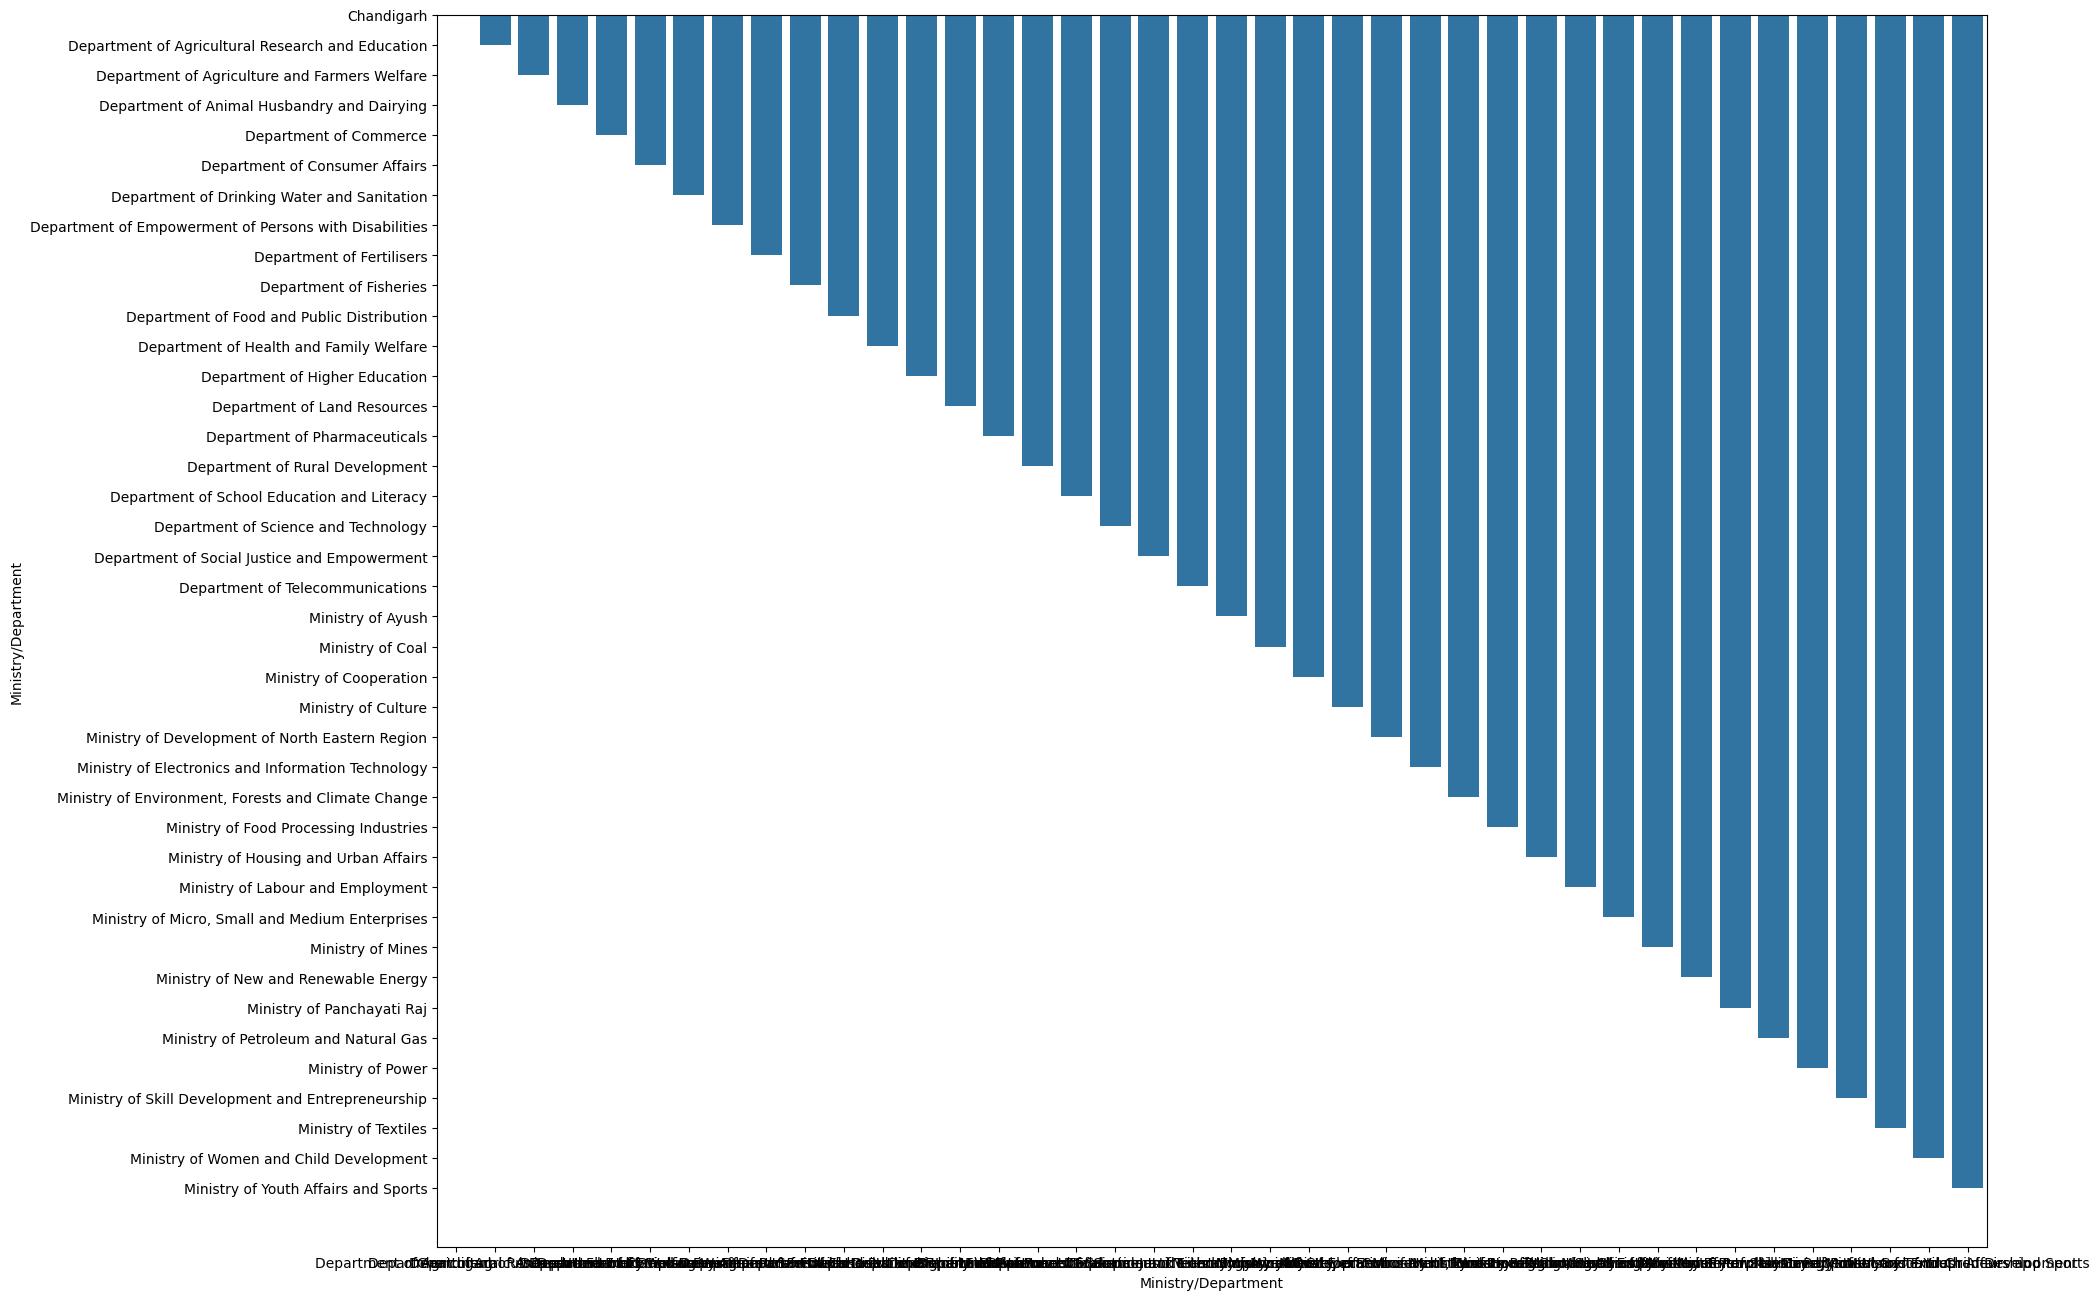

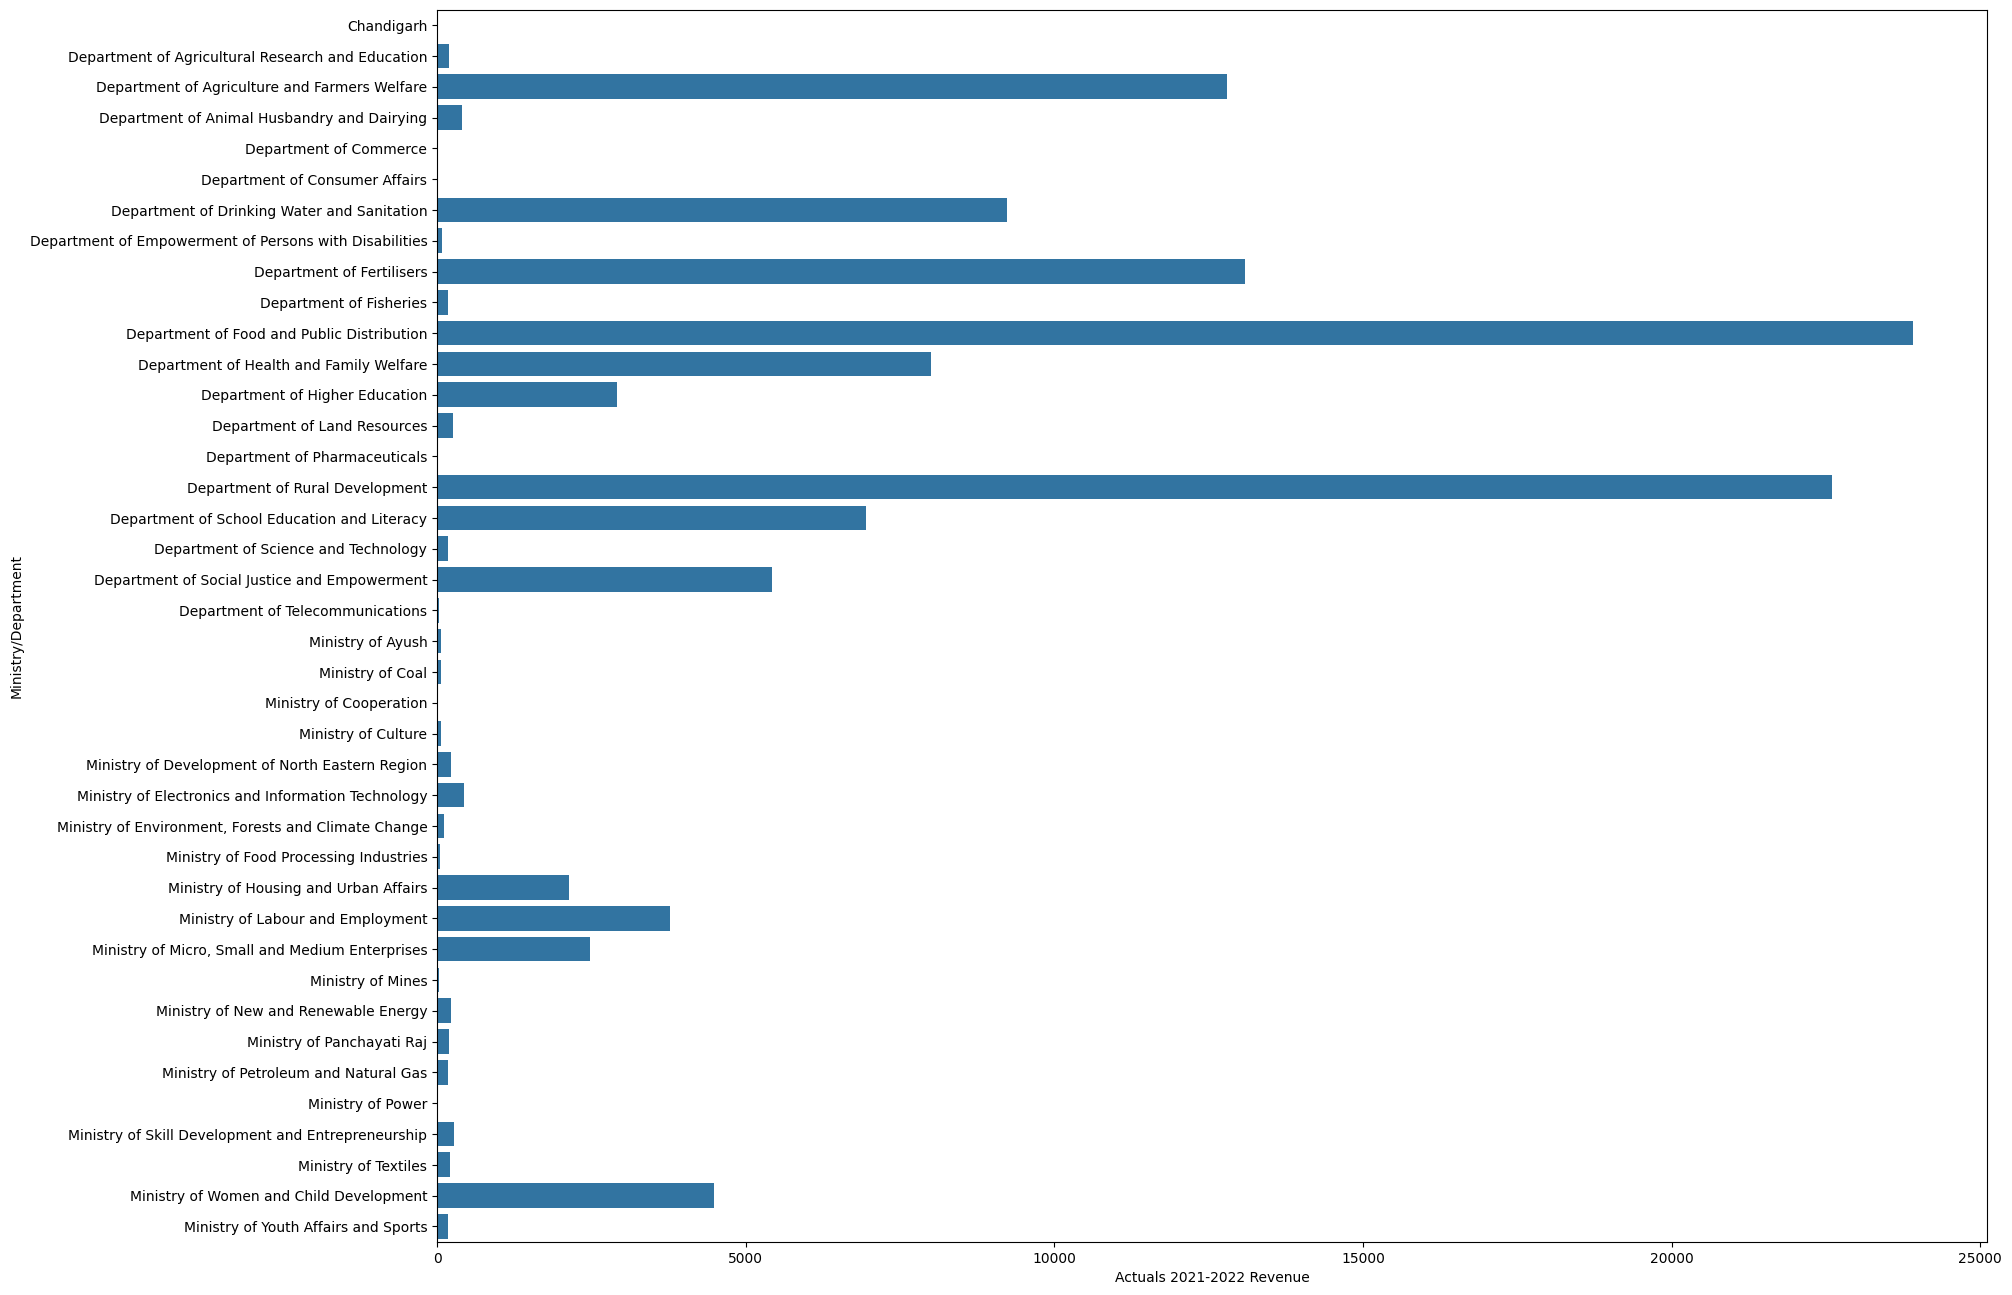

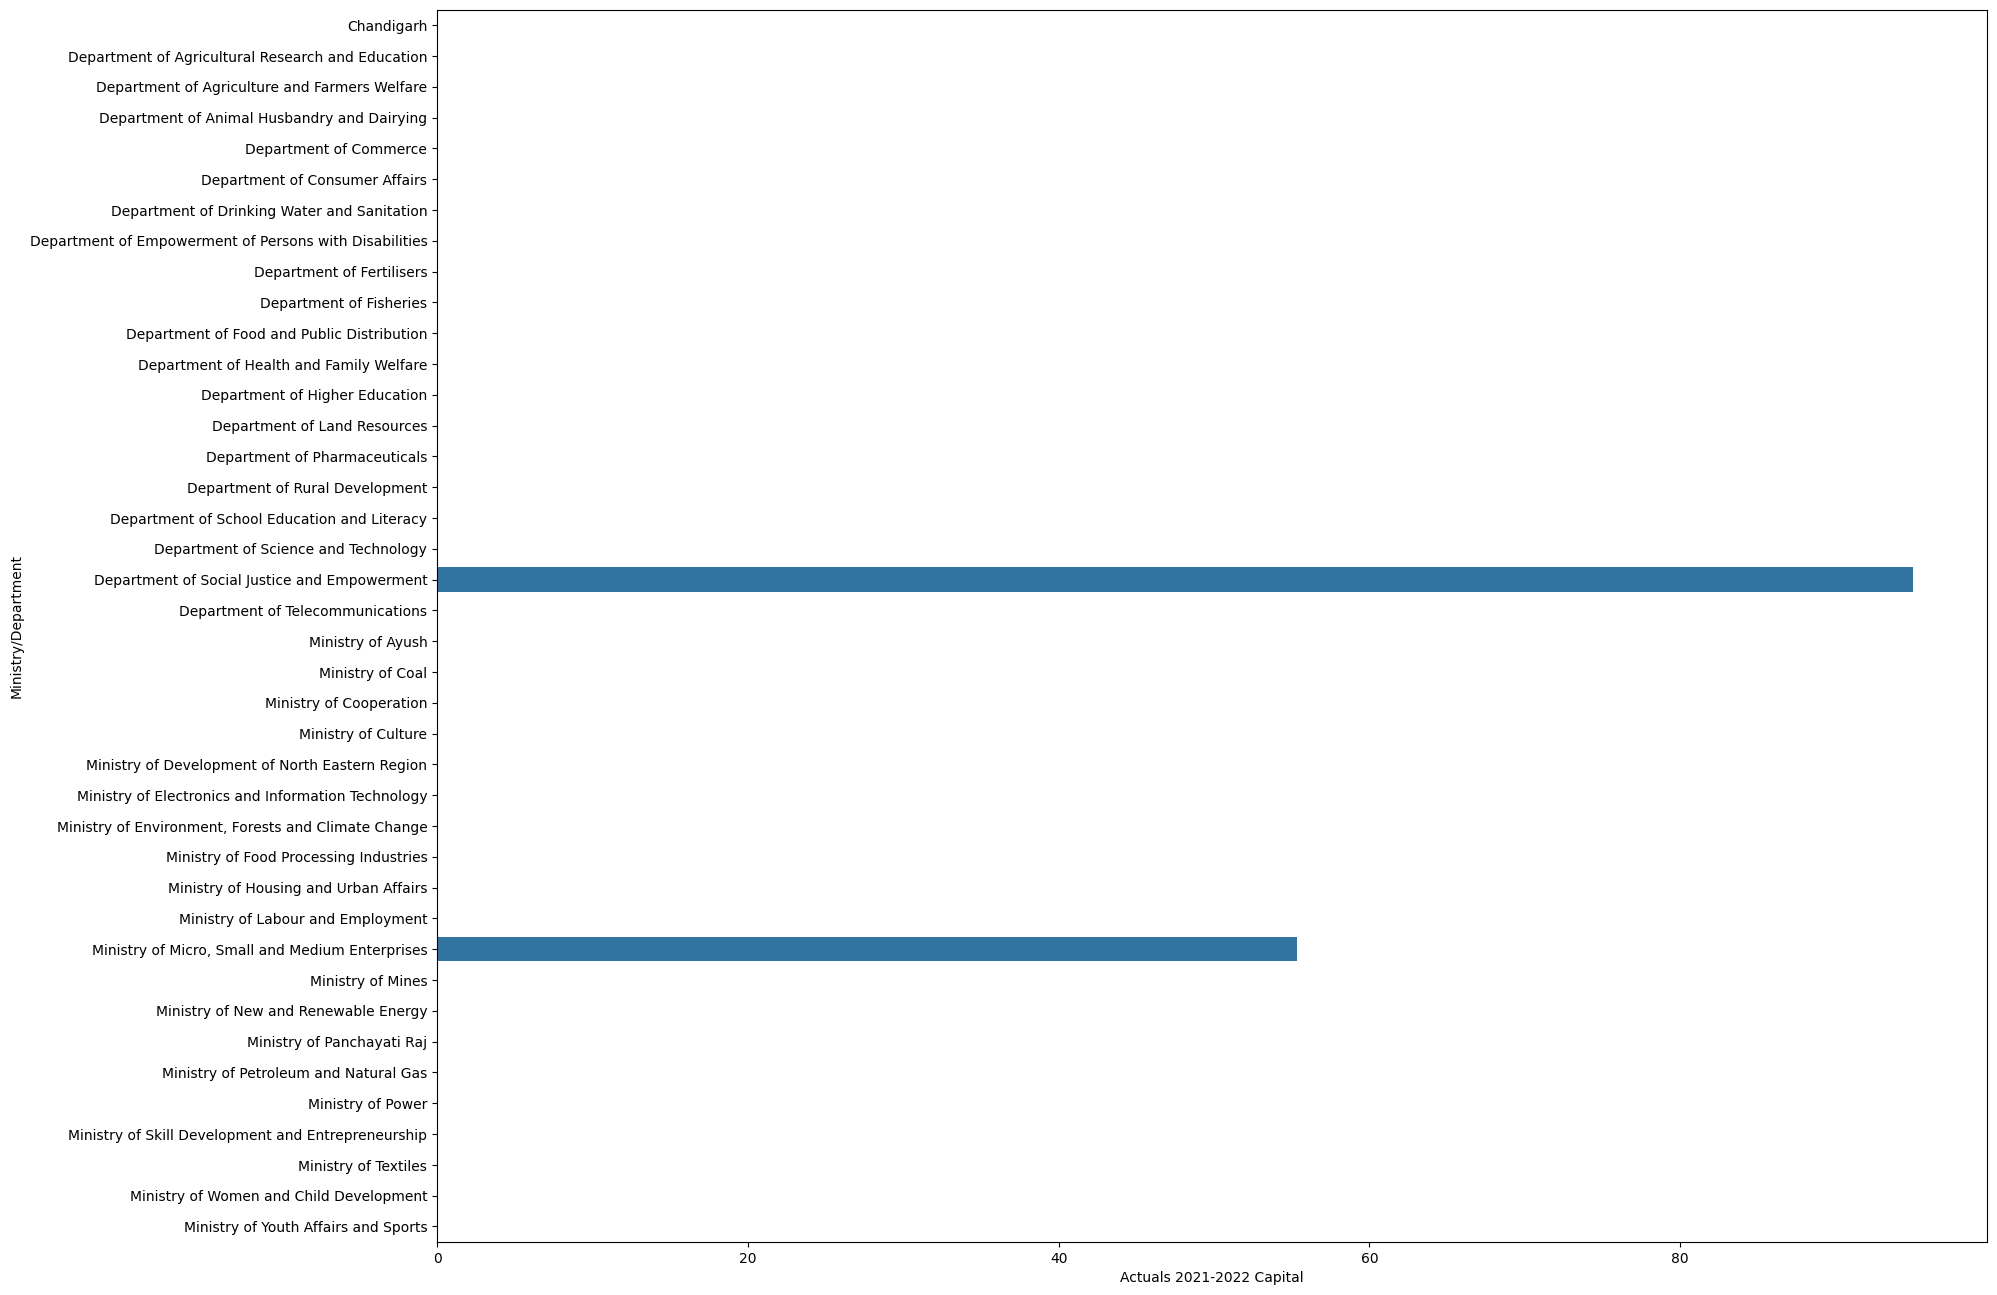

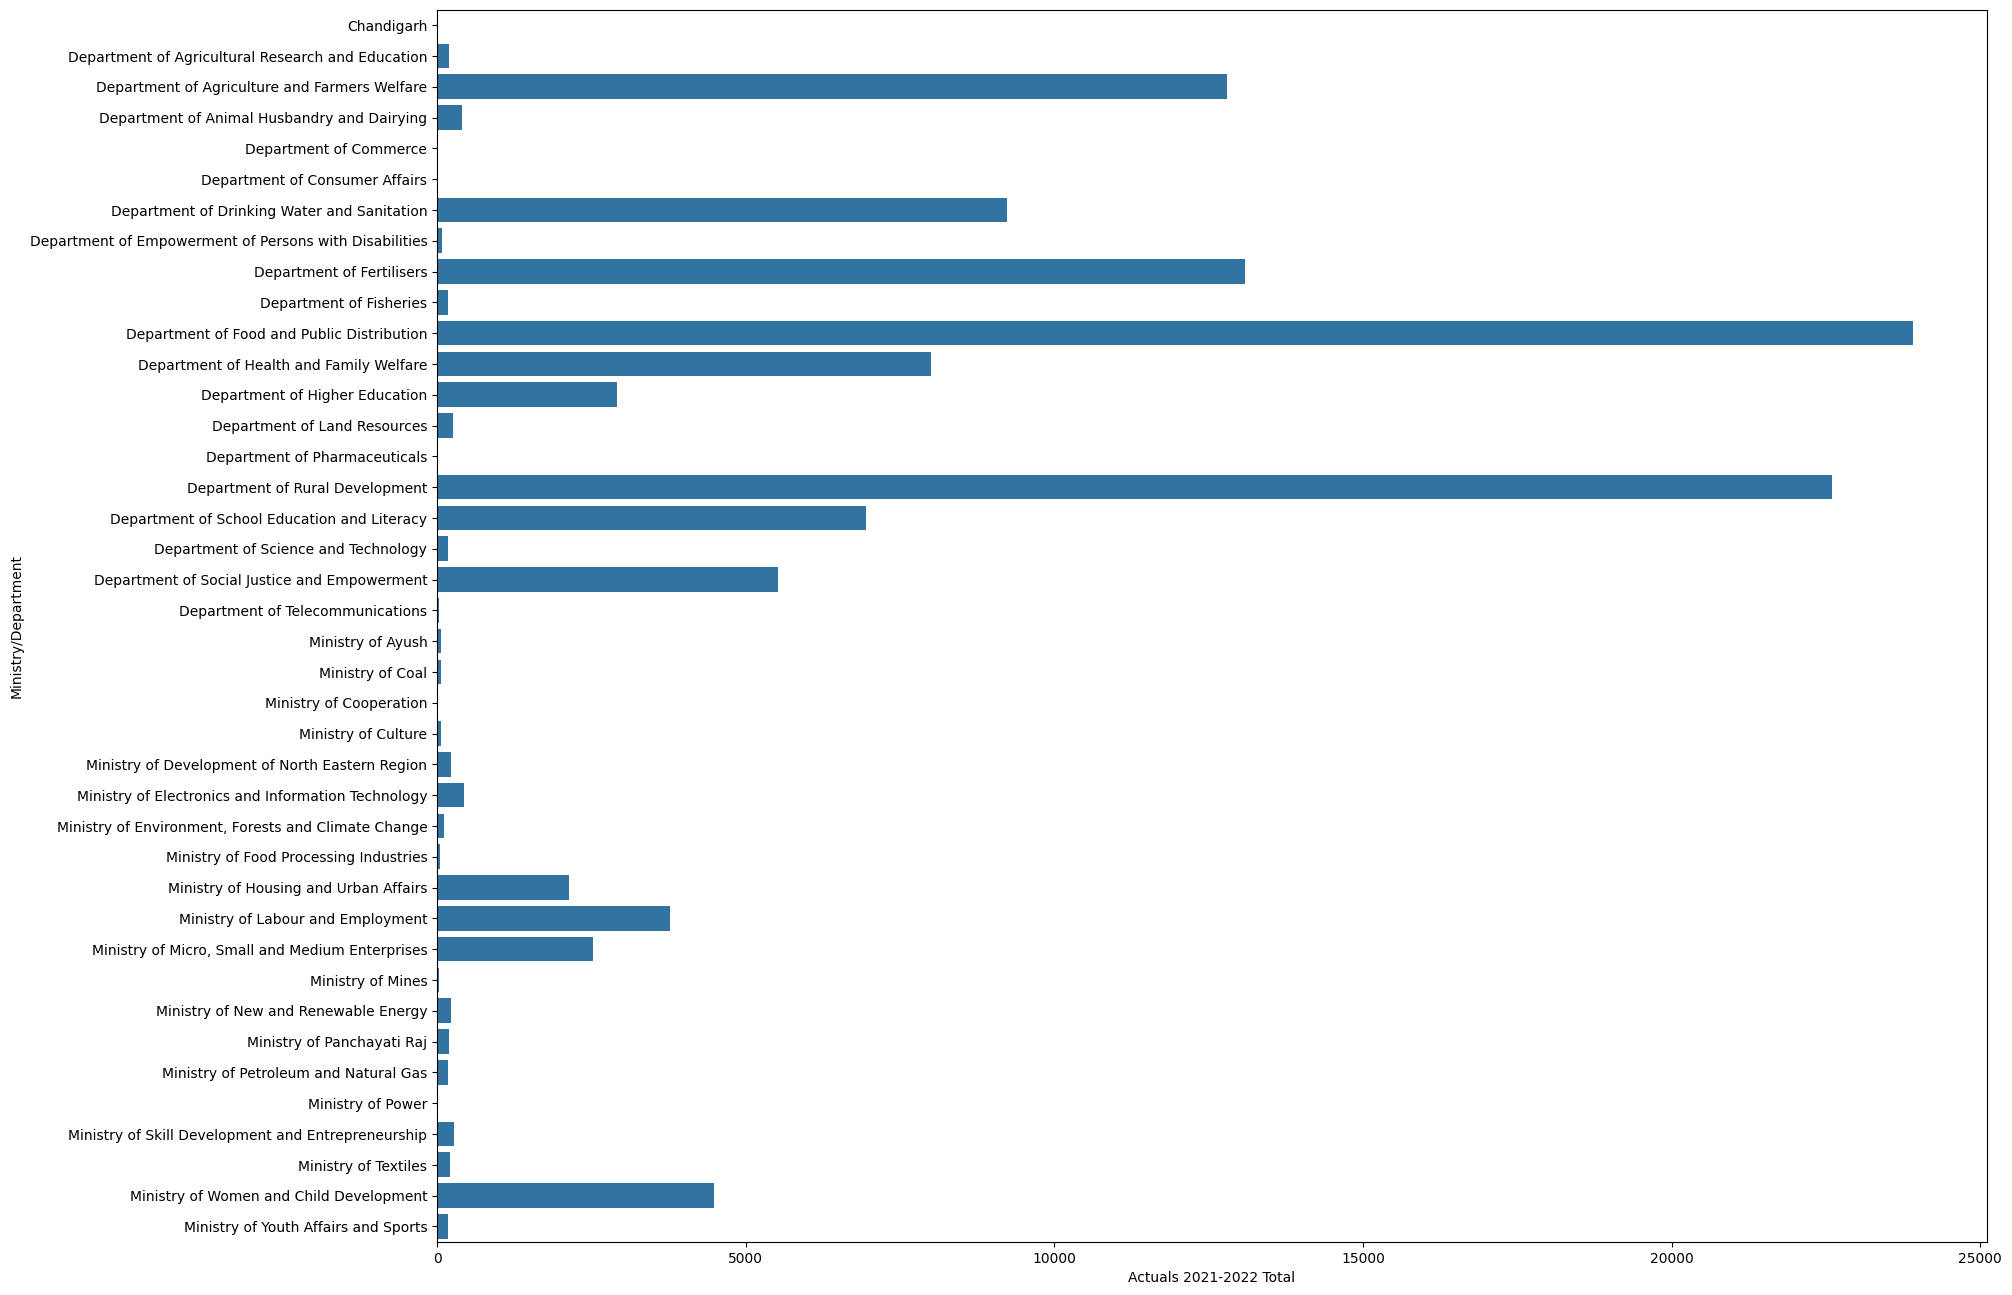

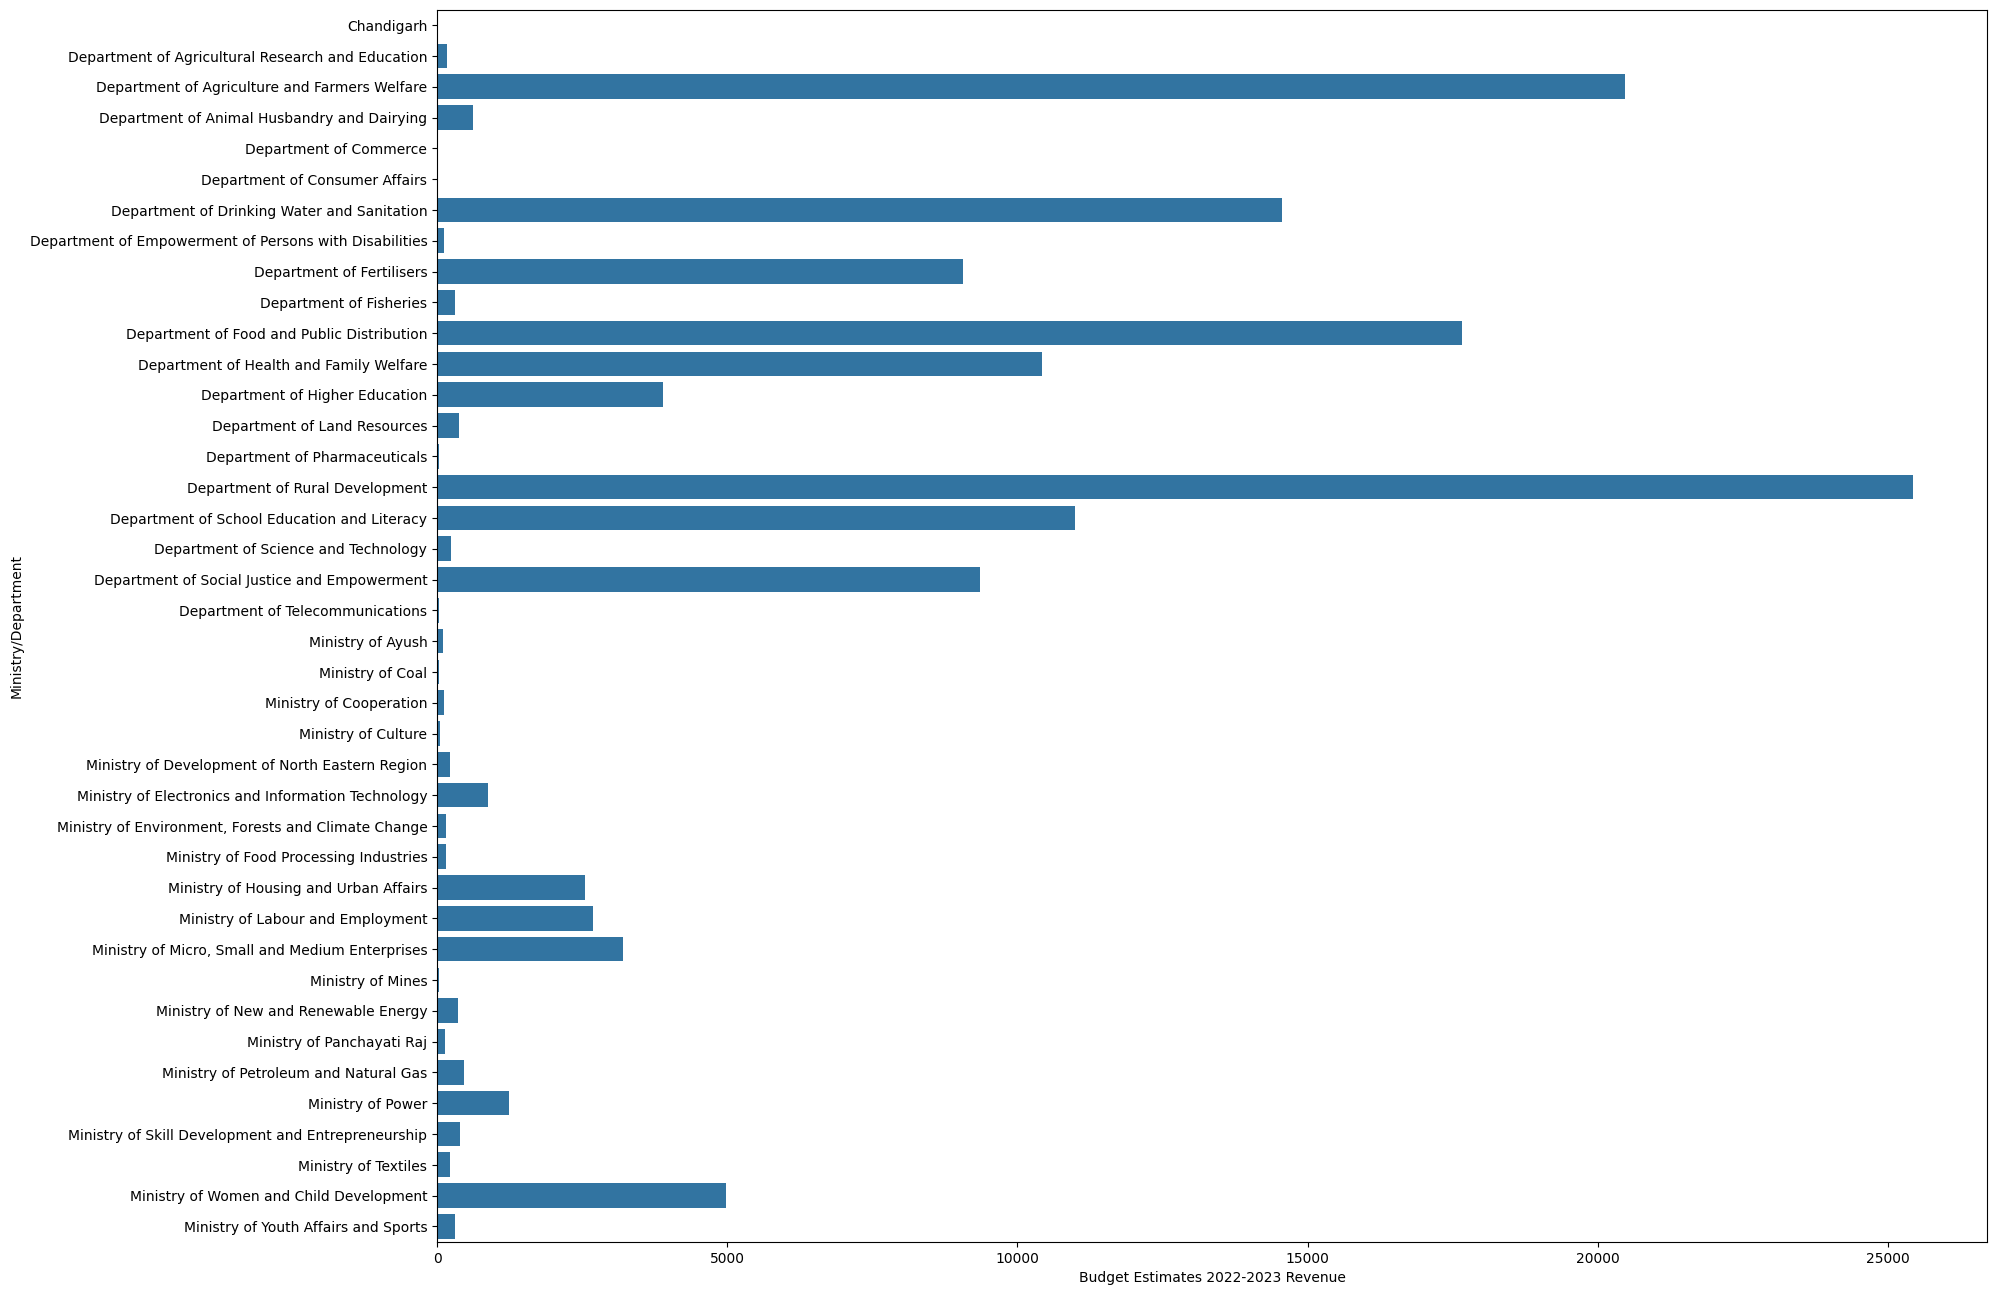

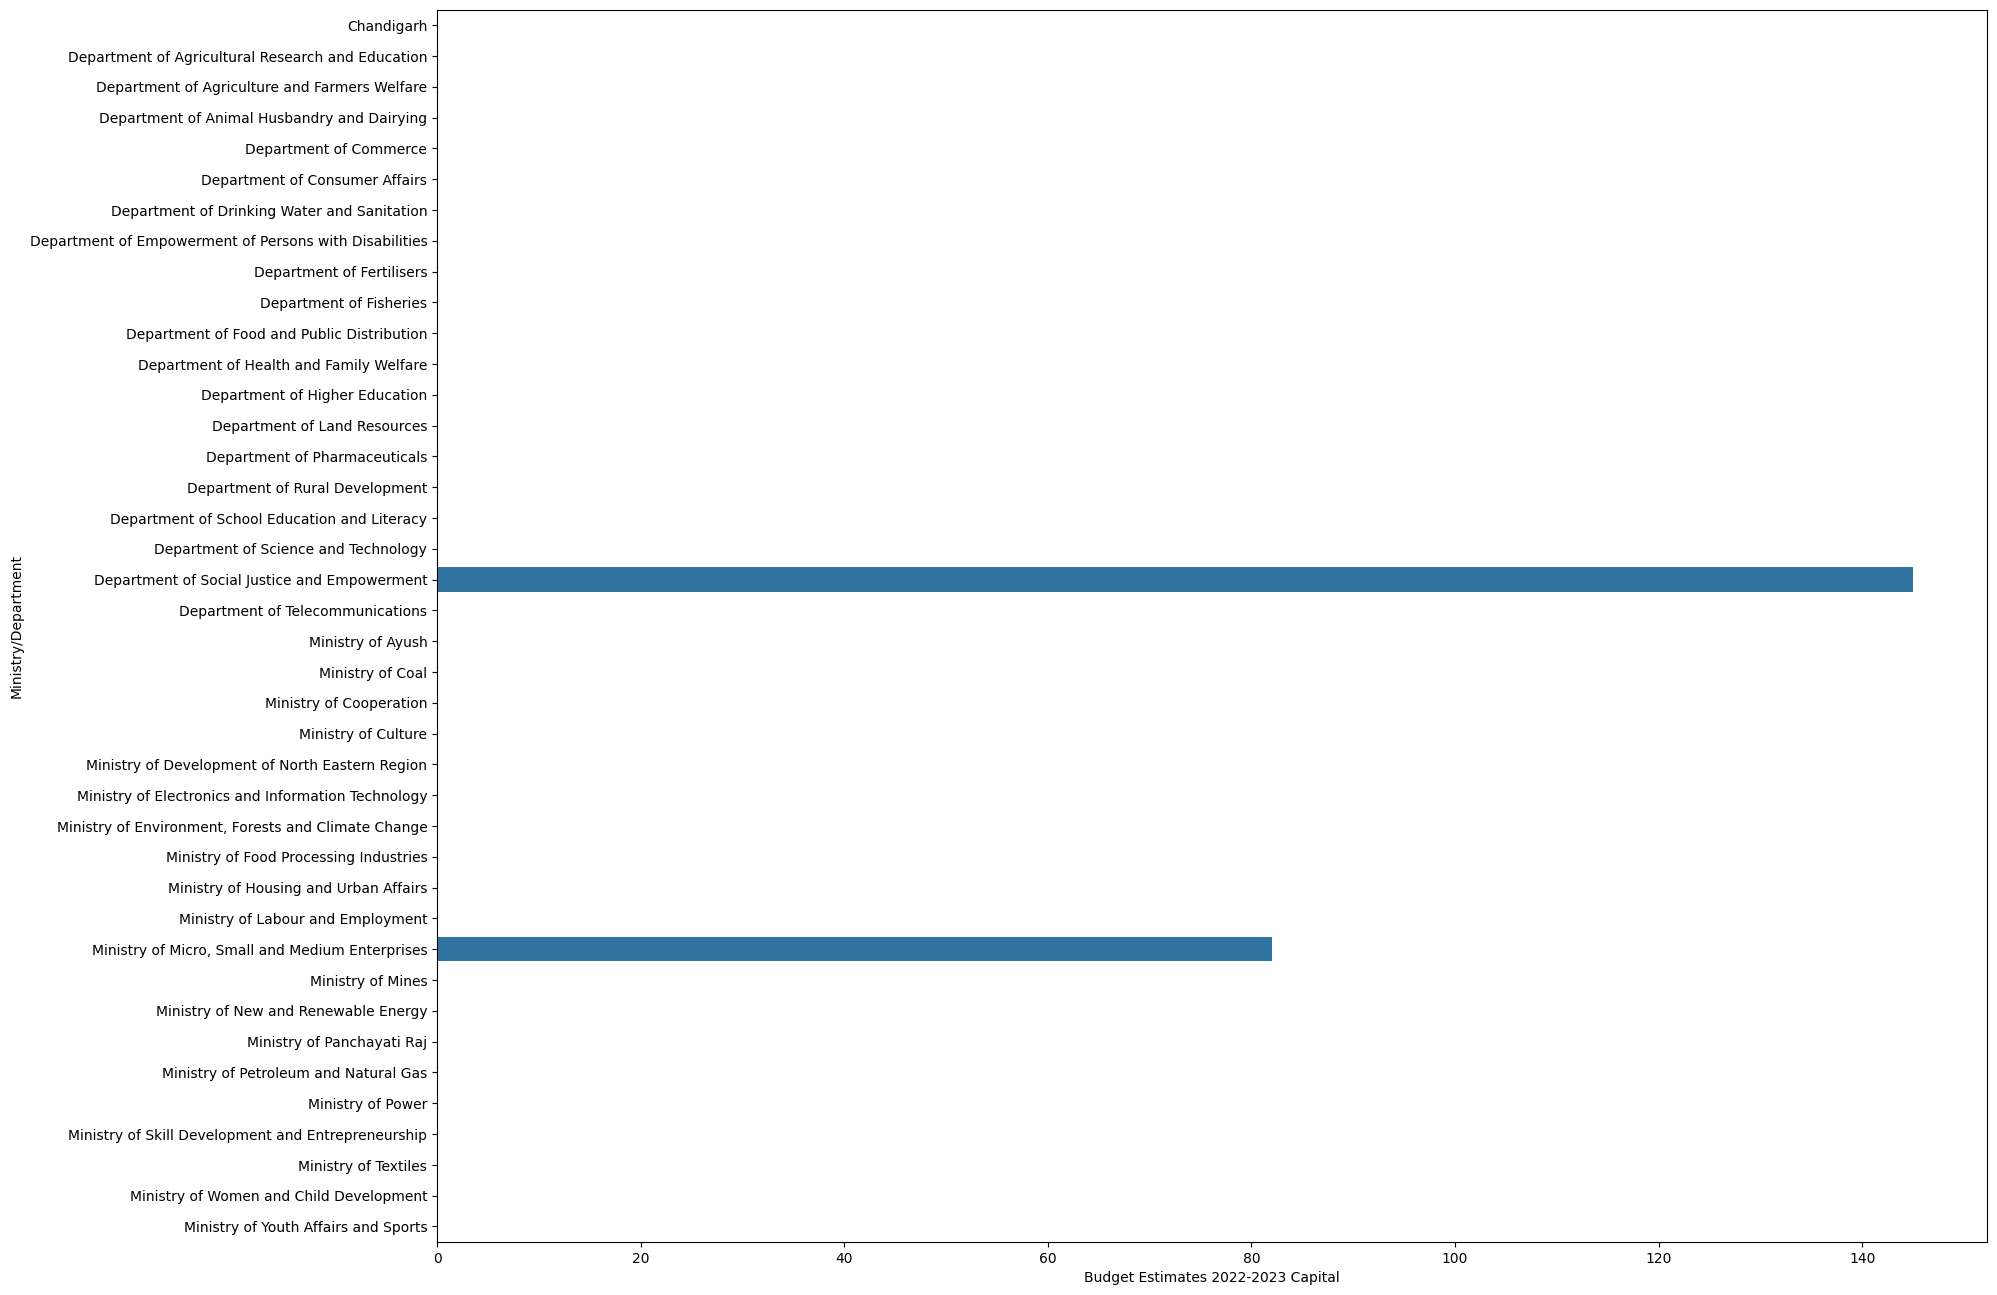

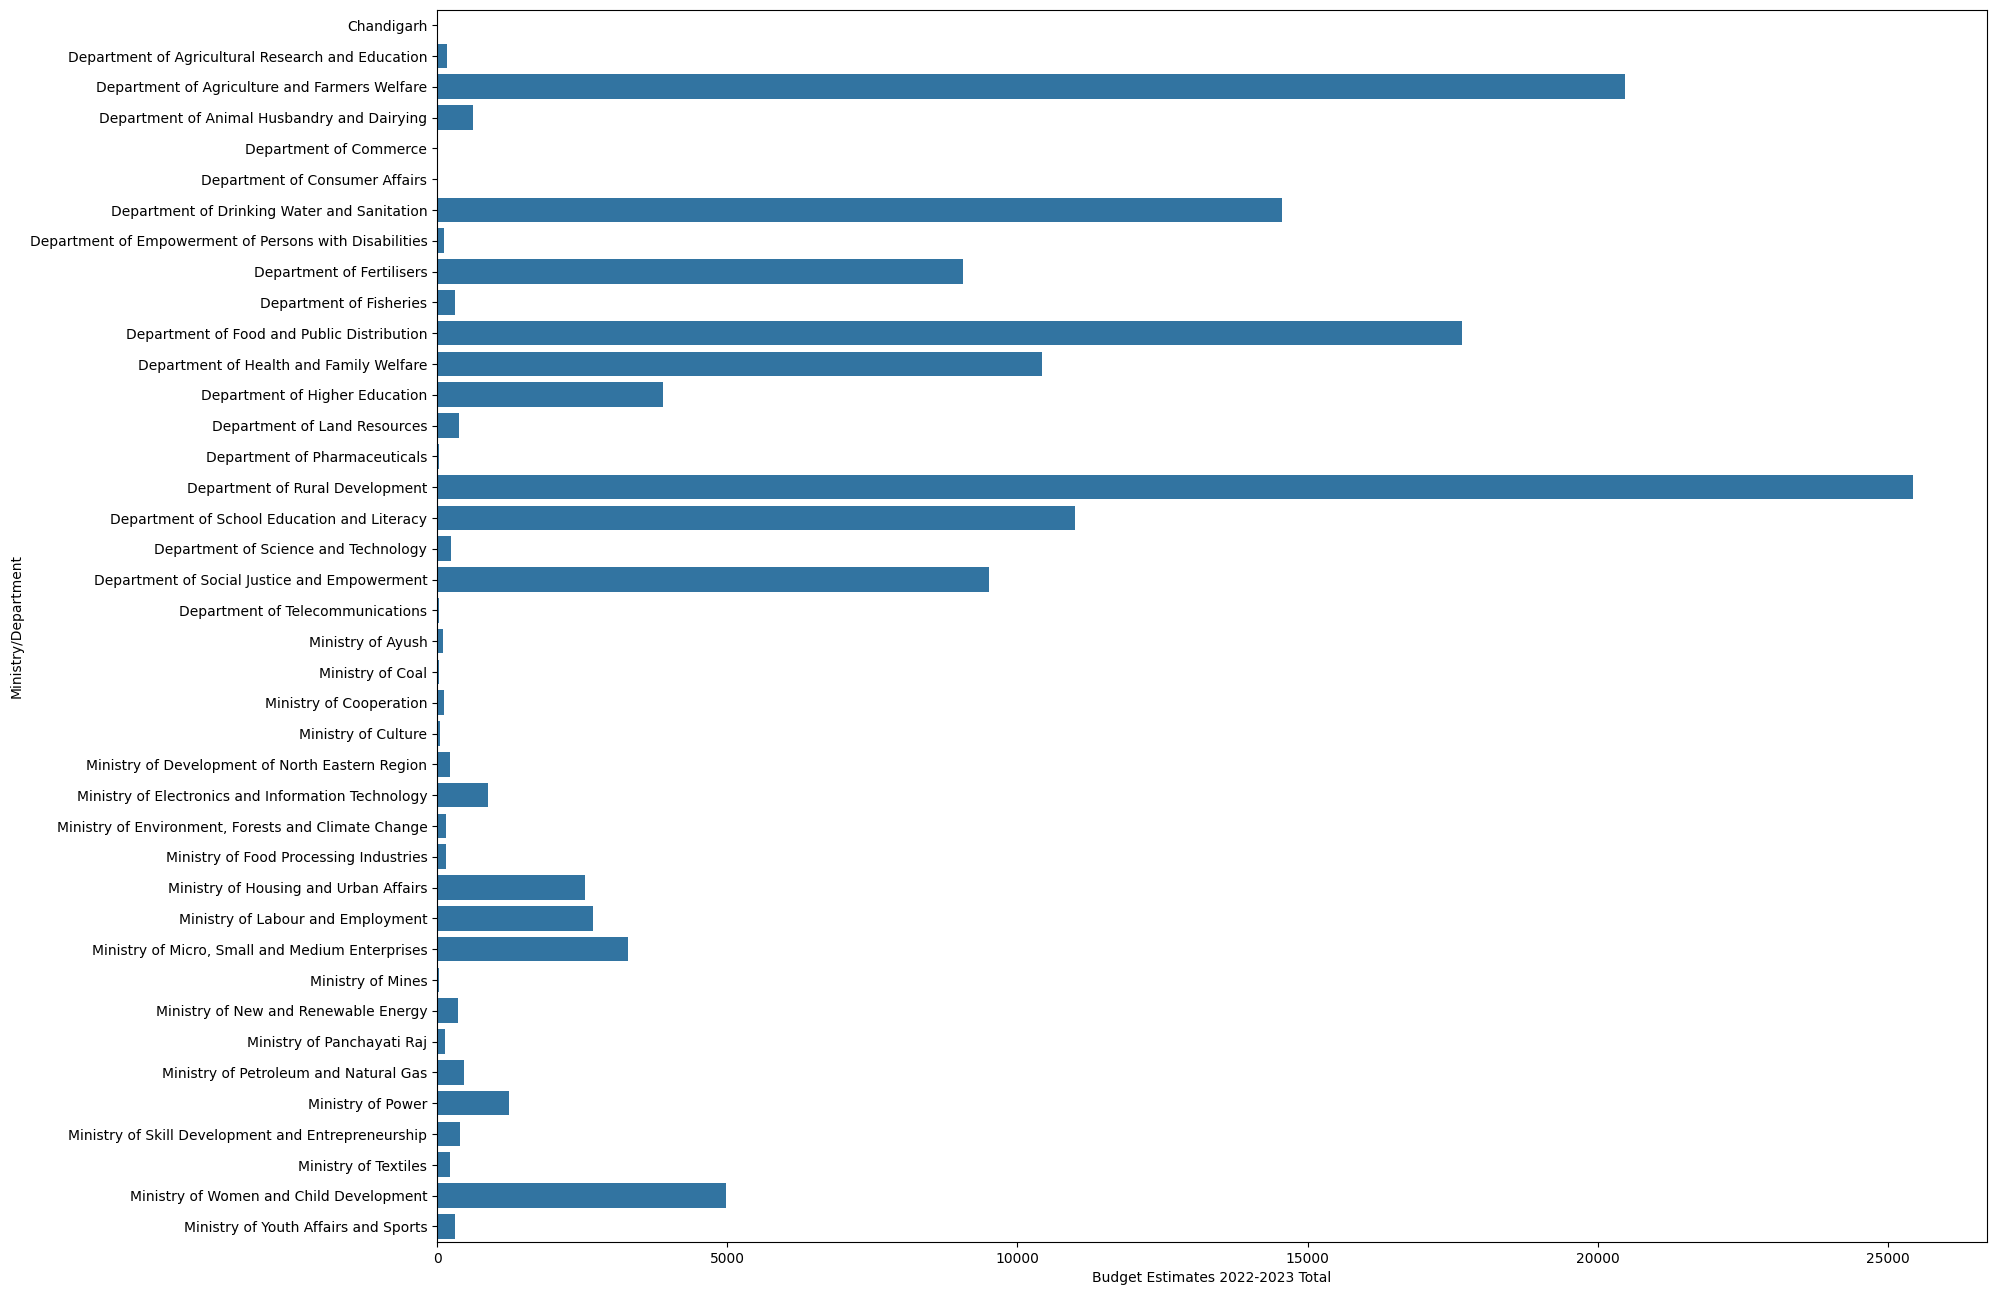

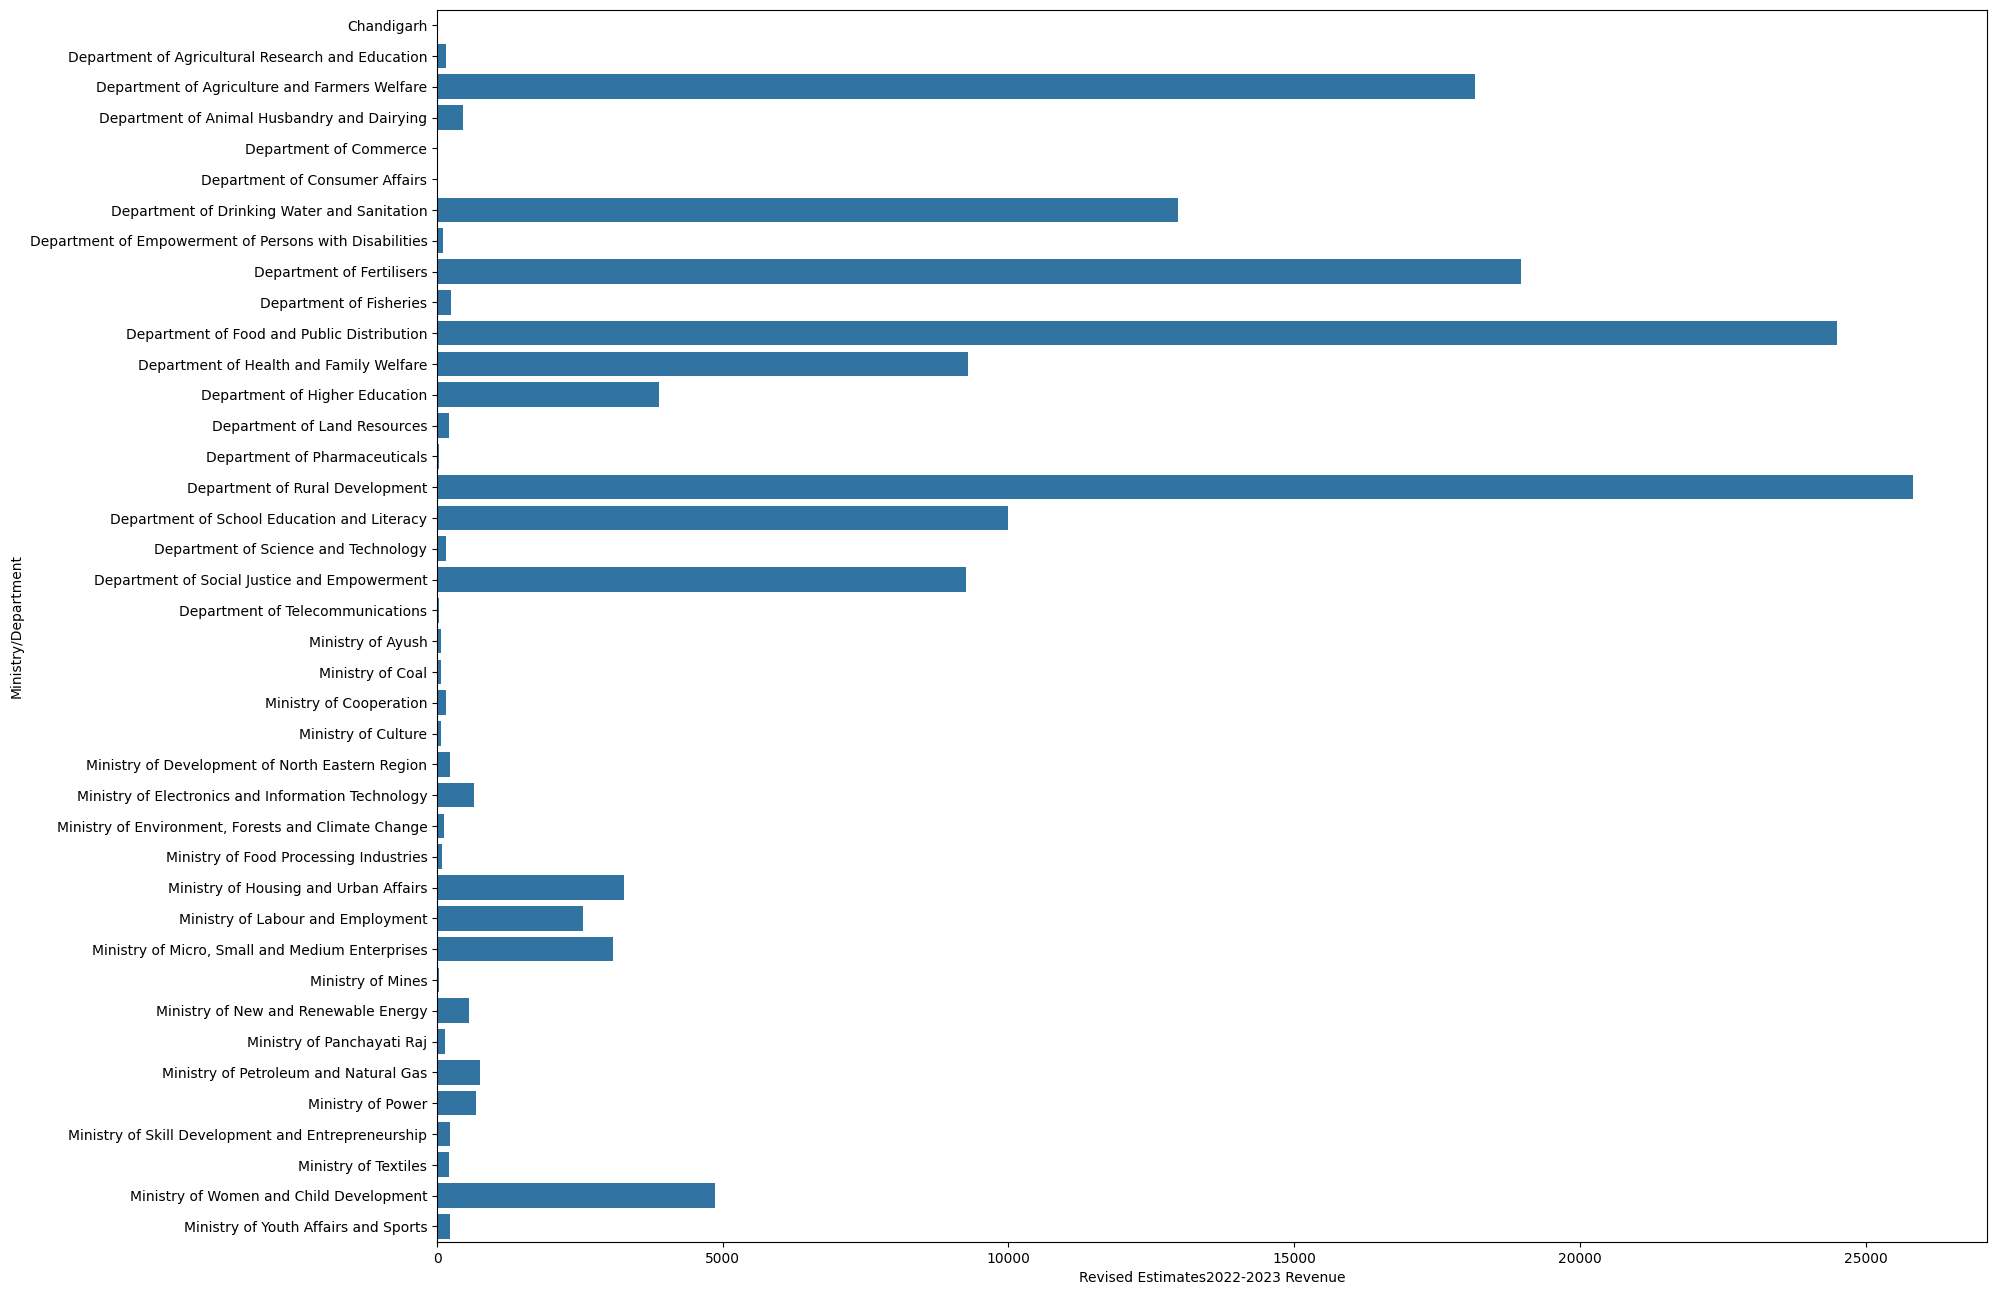

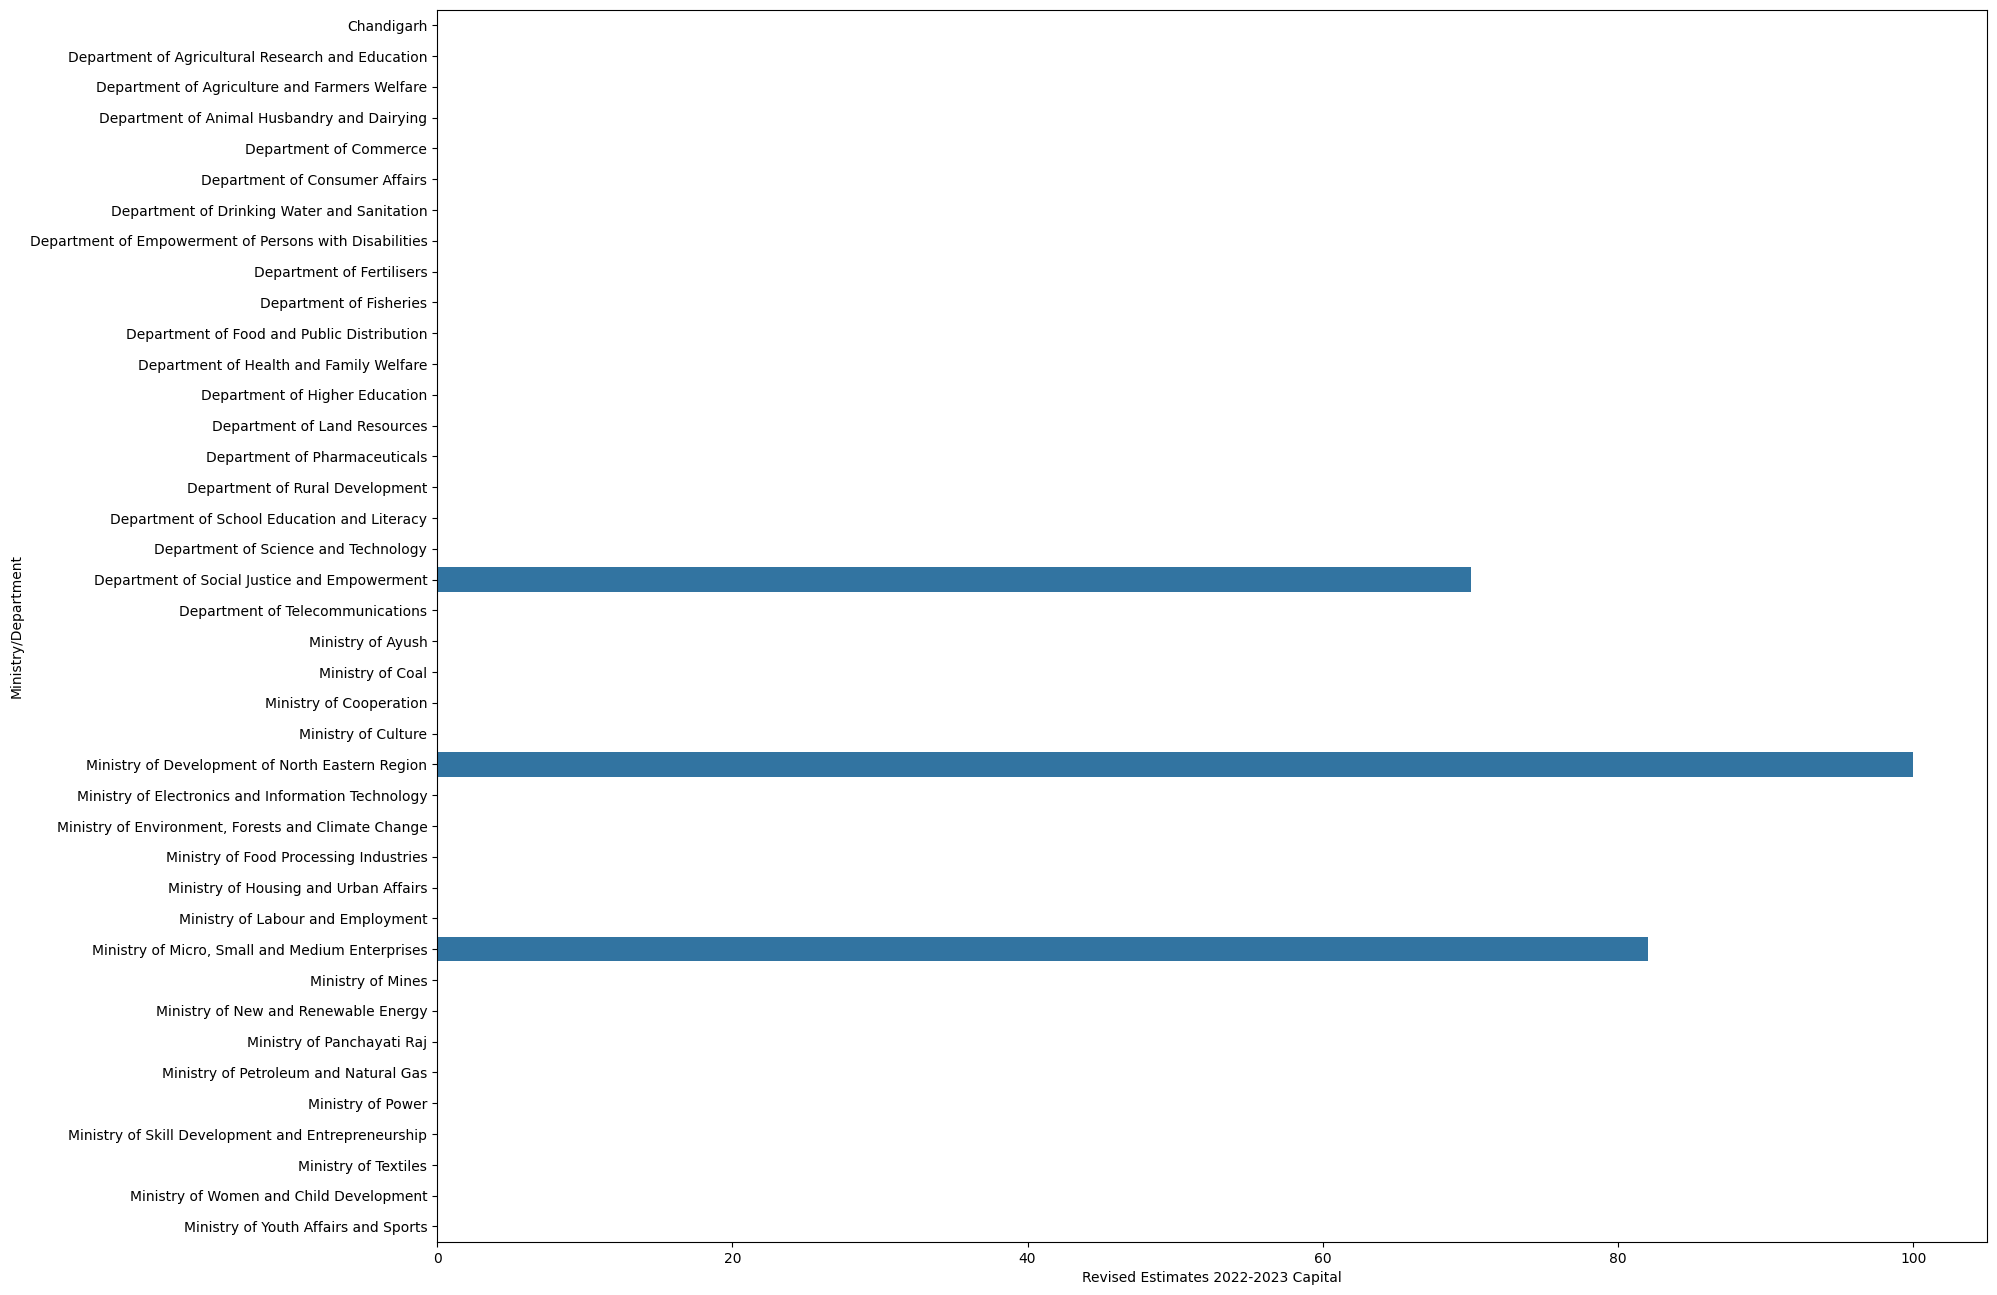

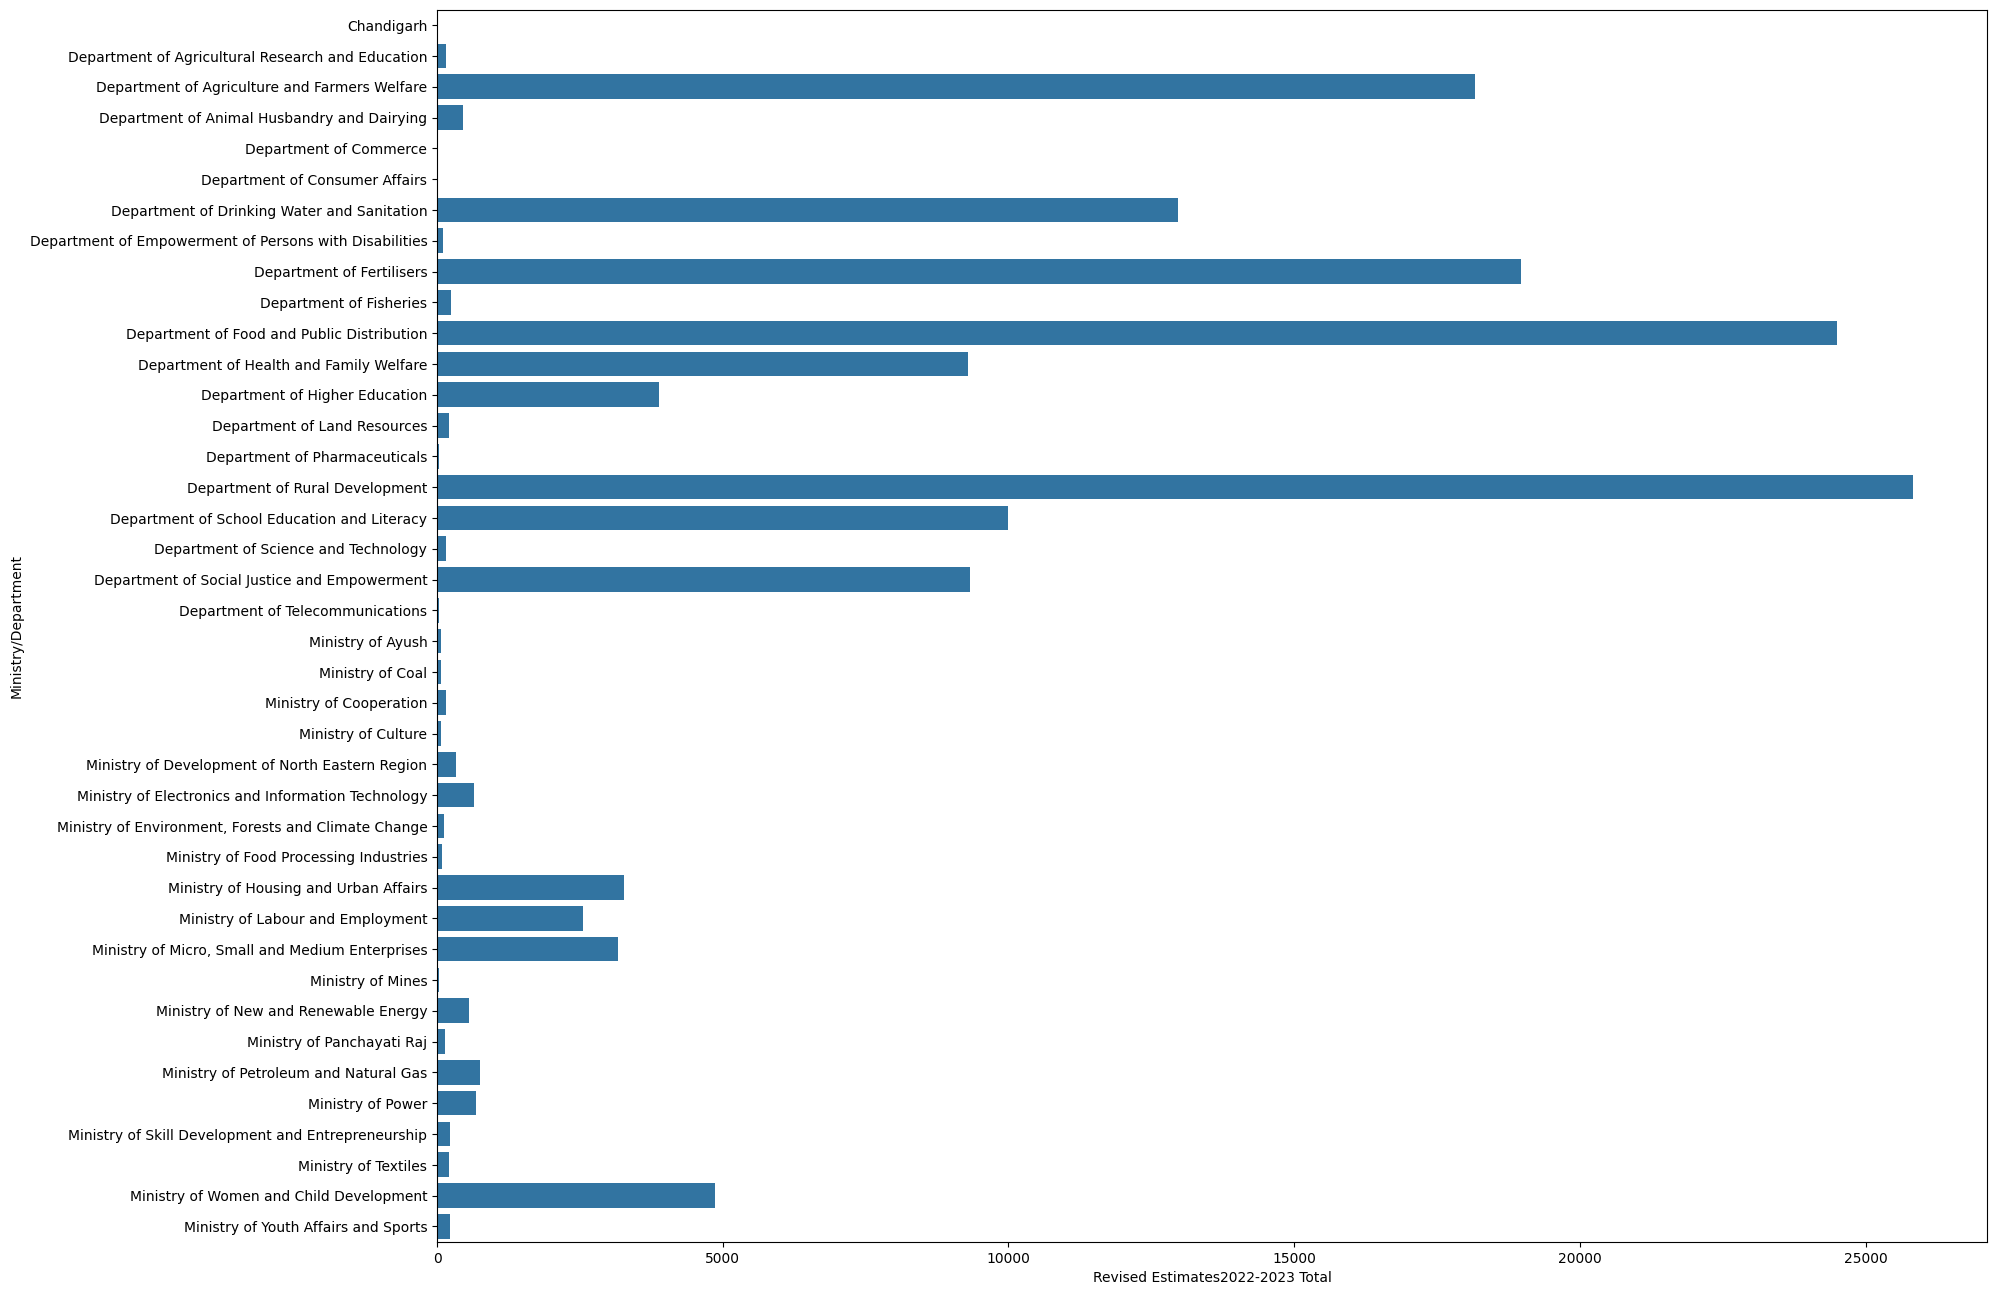

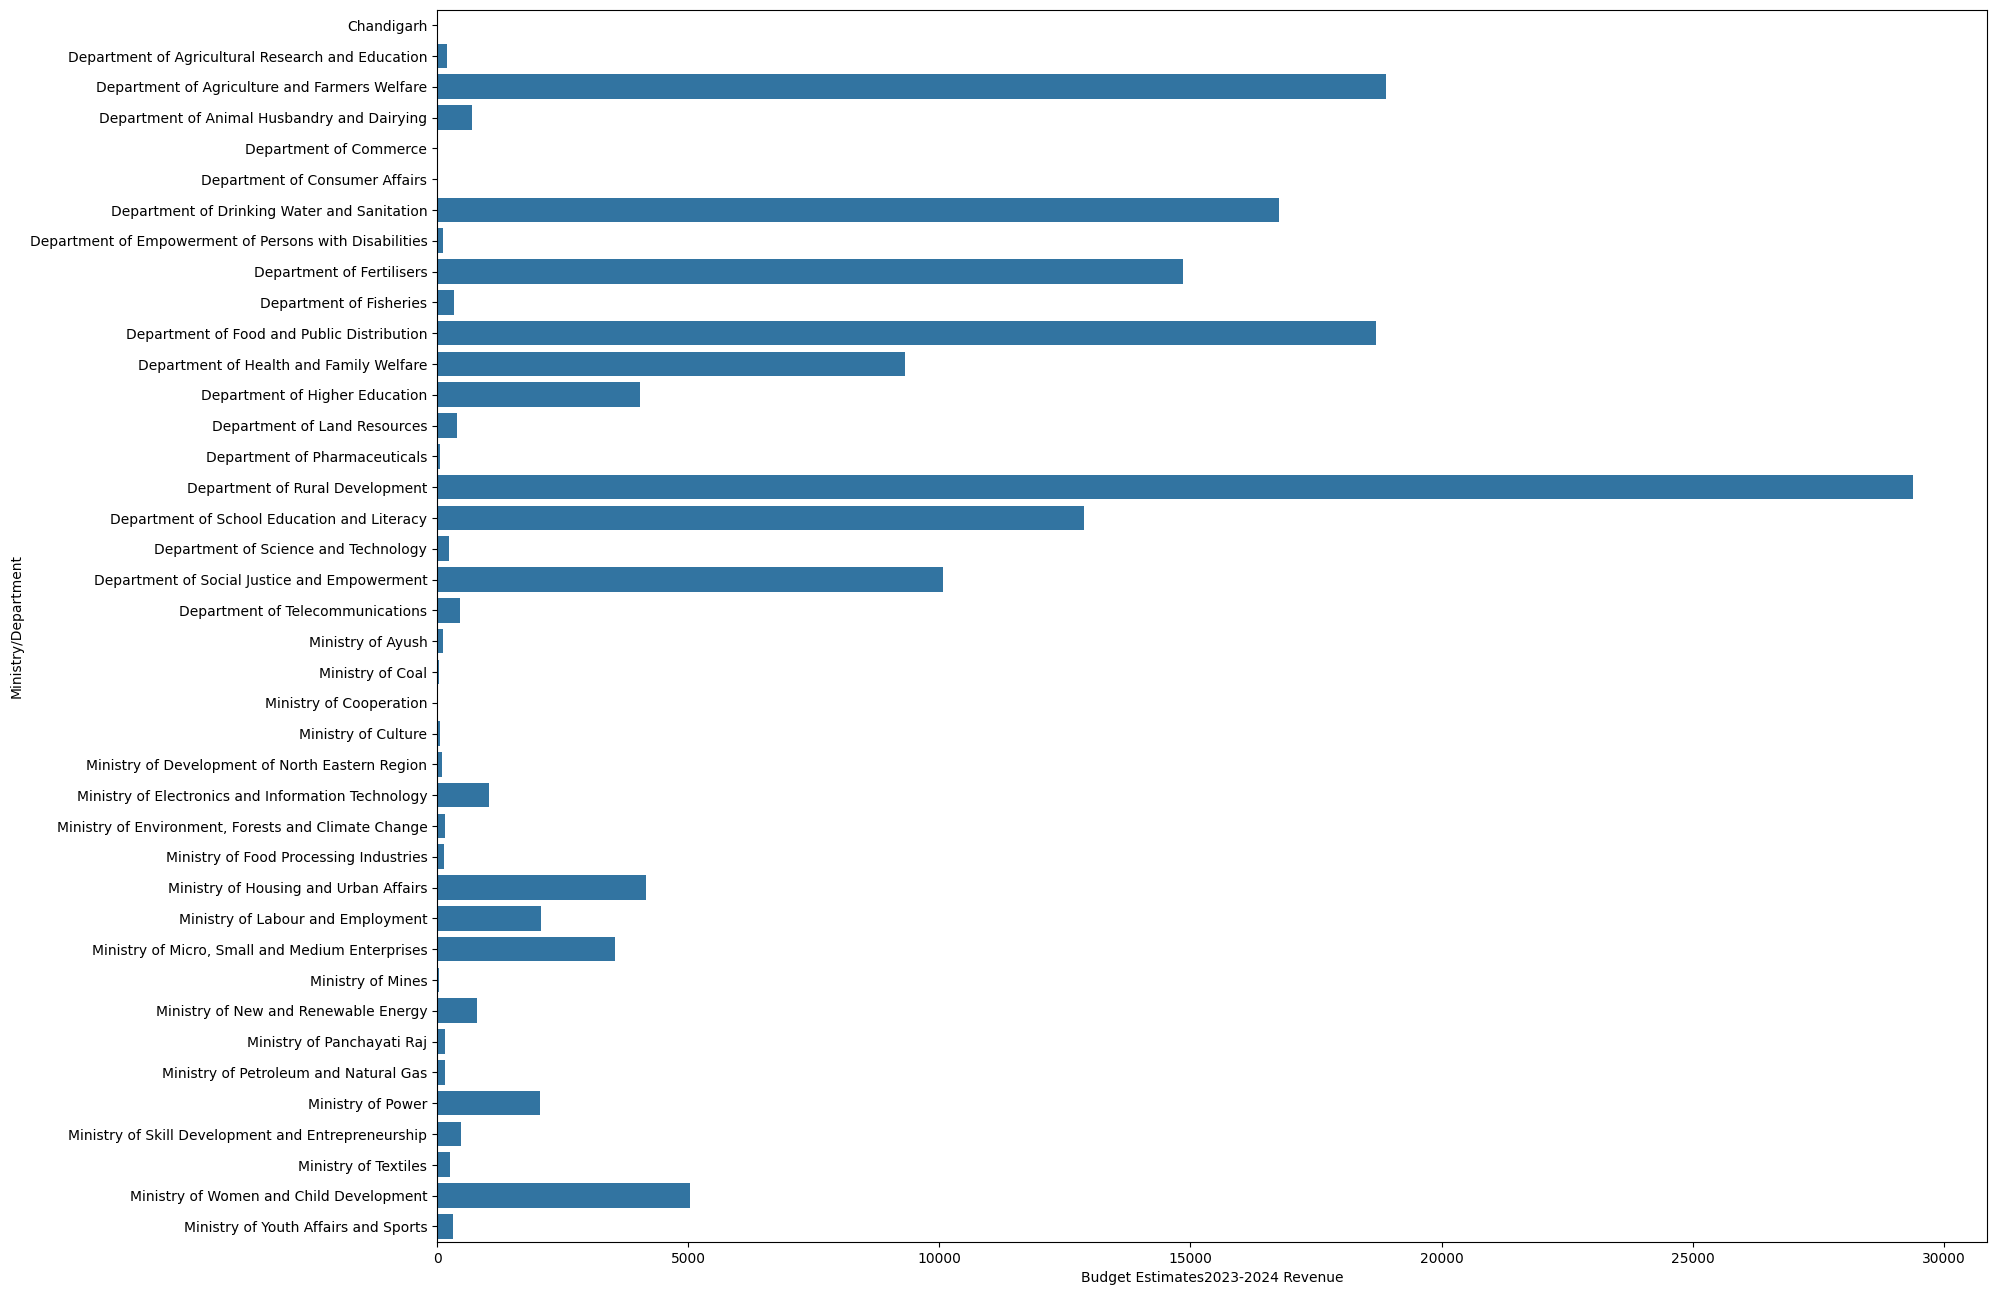

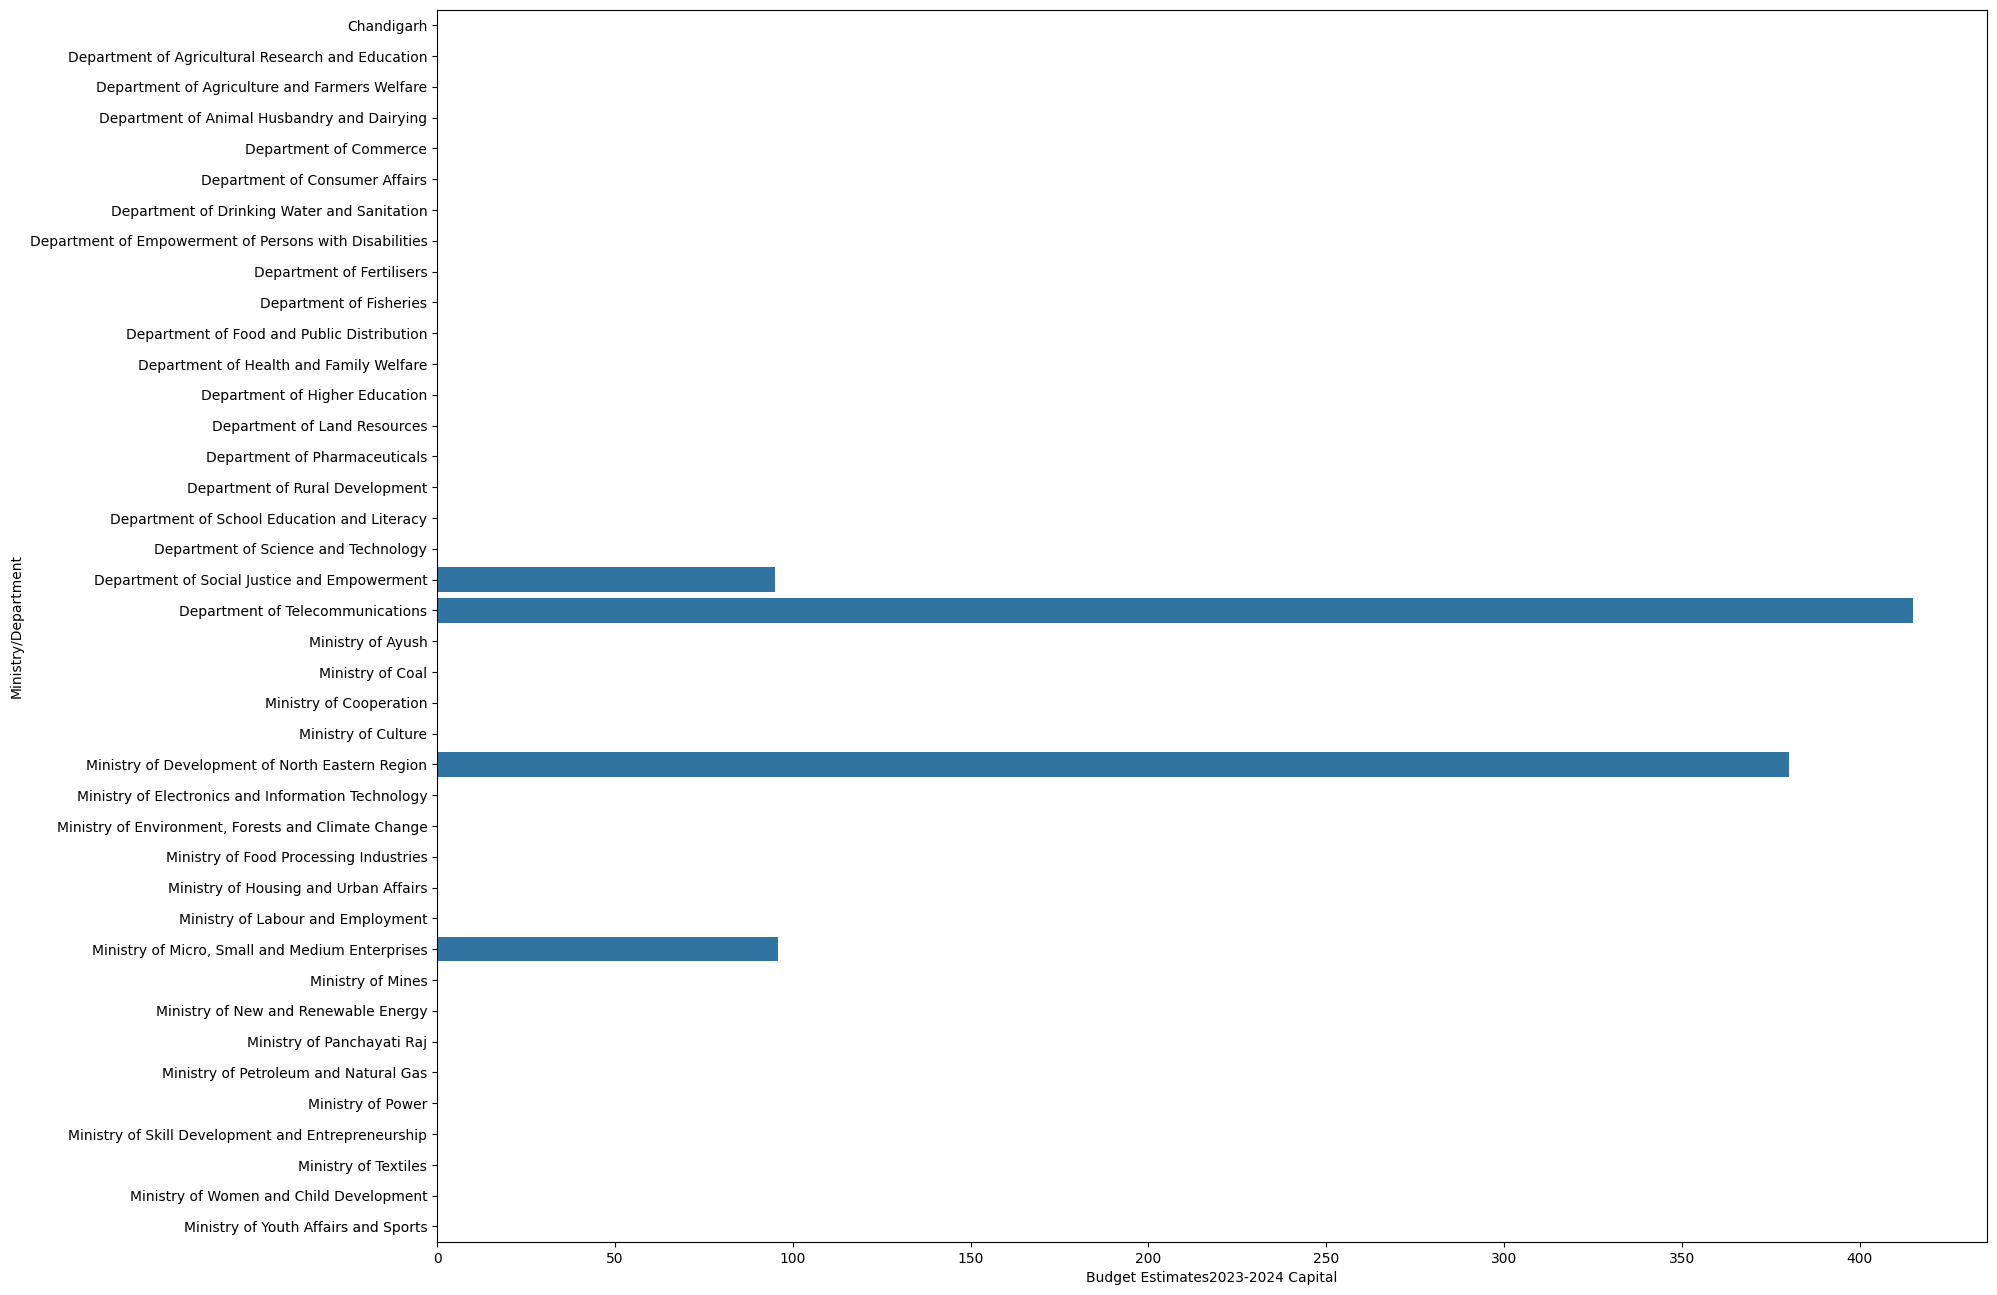

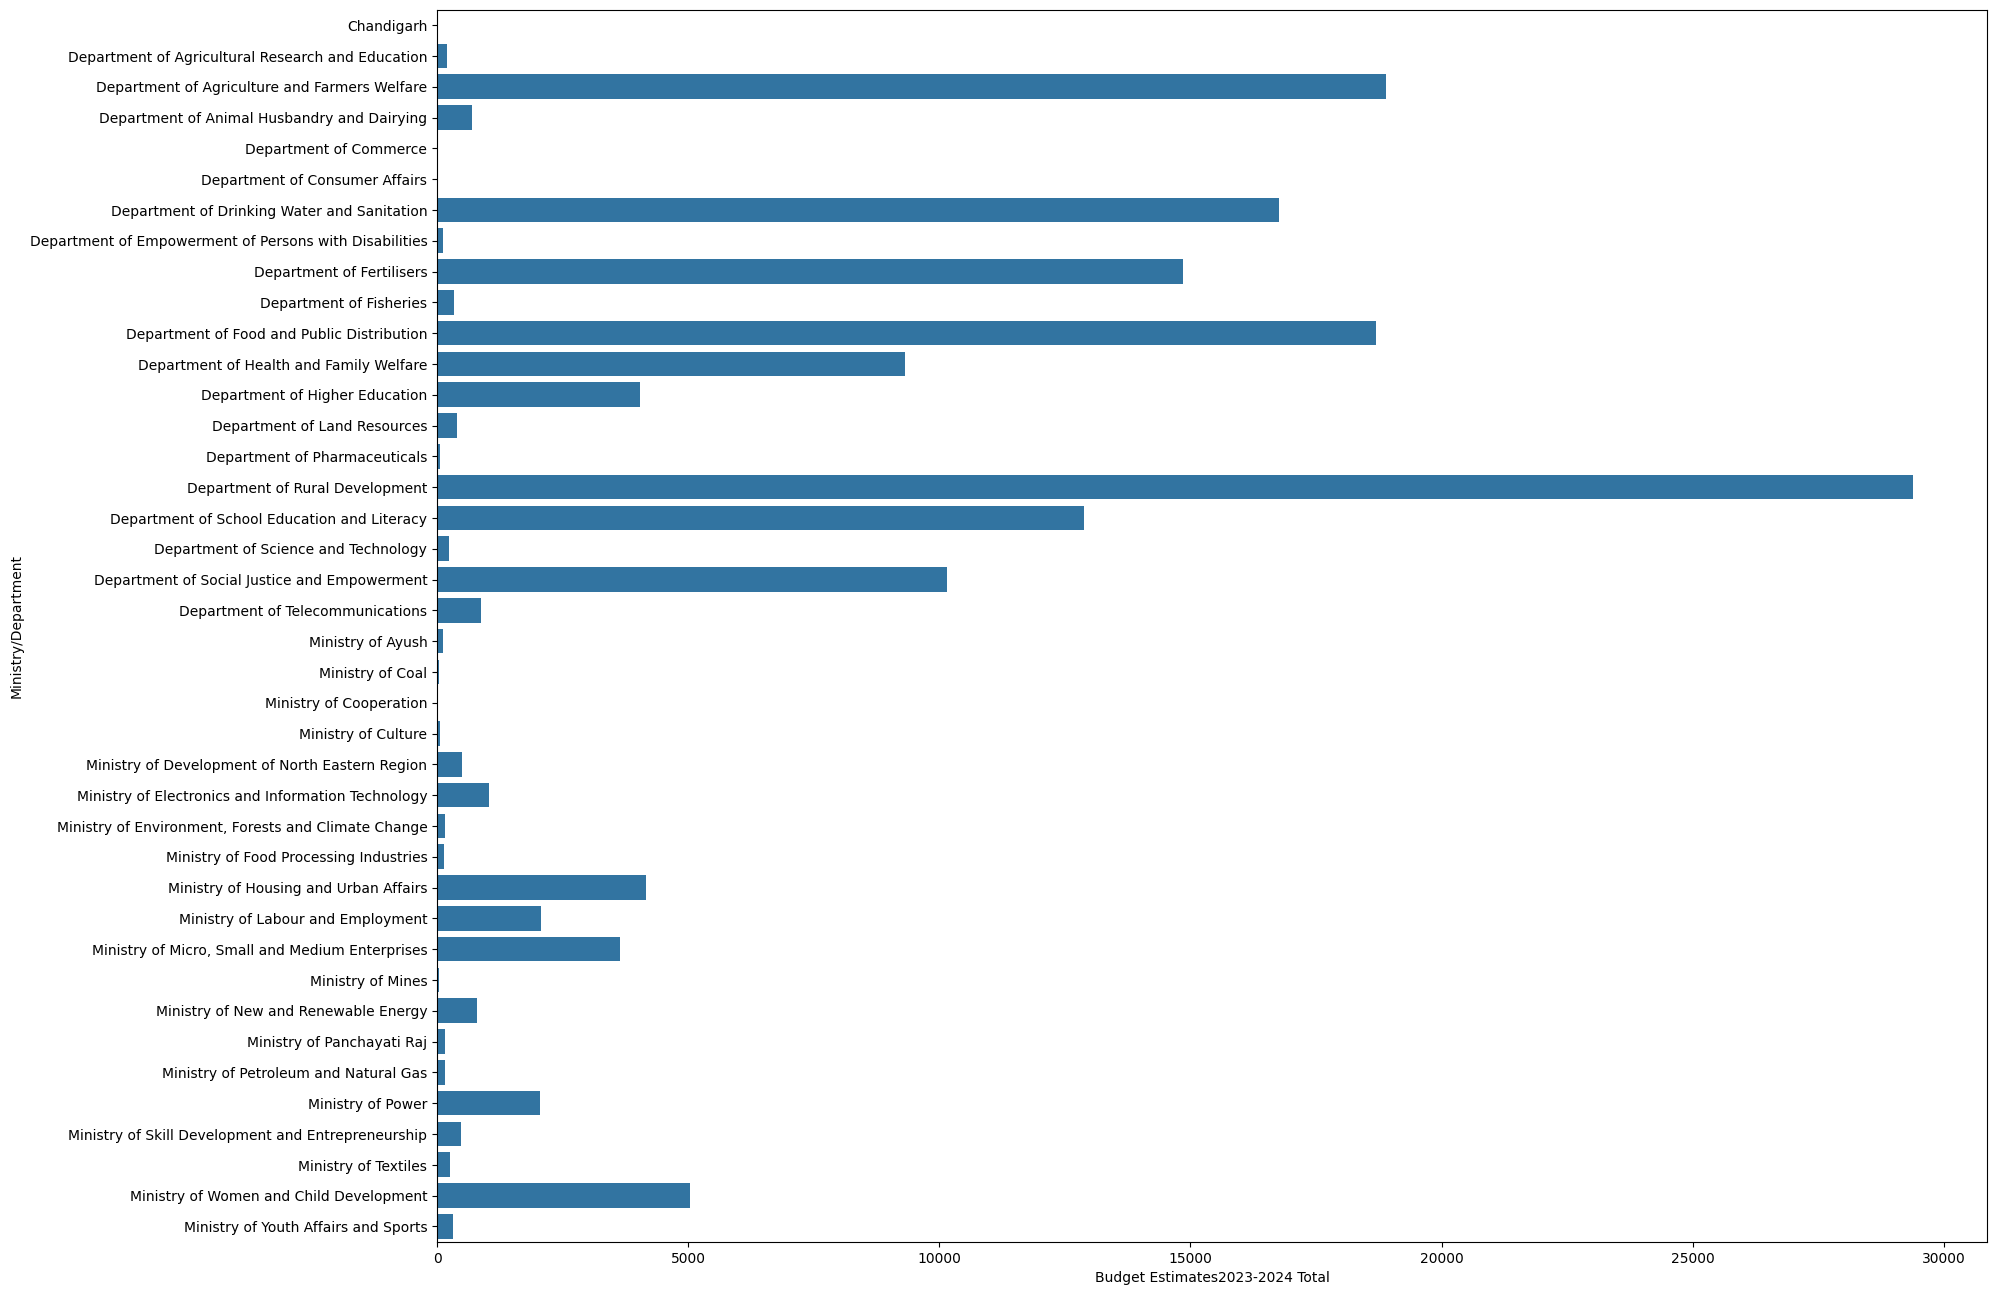

In [14]:
for index, column_name in enumerate(ministry_data.drop(['Scheme'], axis=1).columns):
    plt.figure(figsize=(20,16))
    sns.barplot(x=ministry_data[column_name], y=ministry_data['Ministry/Department'])


* Top 4 Revenue Expenditures in 2021-2022 were from the **Department of Rural Development**, **Department of Food and Public Distribution**, **Department of Fertilizers**, and **Department of Agriculture and Farmers Welfare**.
* Capital Expenditures in 2021-2022 were applicable only in the **Department of Social Justice and Empowerment** and the **Ministry of Micro, Small and Medium Enterprises**.
* Top 4 Estimated Revenue Expenditures in 2022-2023 were from the **Department of Rural Development**, **Department of Food and Public Distribution**, **Department of Drinking Water and Sanitation**, and **Department of Agriculture and Farmers Welfare**.
* Capital Expenditures in 2022-2023 were applicable only in the **Department of Social Justice and Empowerment** and the **Ministry of Micro, Small and Medium Enterprises**.
* Based on actual Expenditures, the Top 4 Estimated Revenue Expenditures in 2022-2023 remained the same, but their budgets were increased.
* Based on actual Expenditures, the revised Capital Expenditures in 2022-2023 also included the **Ministry of Development of North Eastern Region**.
* Top 4 Estimated Revenue Expenditures in 2023-2024 were from the **Department of Rural Development**, **Department of Food and Public Distribution**, **Department of Drinking Water and Sanitation**, and **Department of Agriculture and Farmers Welfare**.
* There was a **massive increase** in Capital Expenditures in 2023-2024 for the **Ministry of Development of North Eastern Region** and the **Department of Telecommunications**.

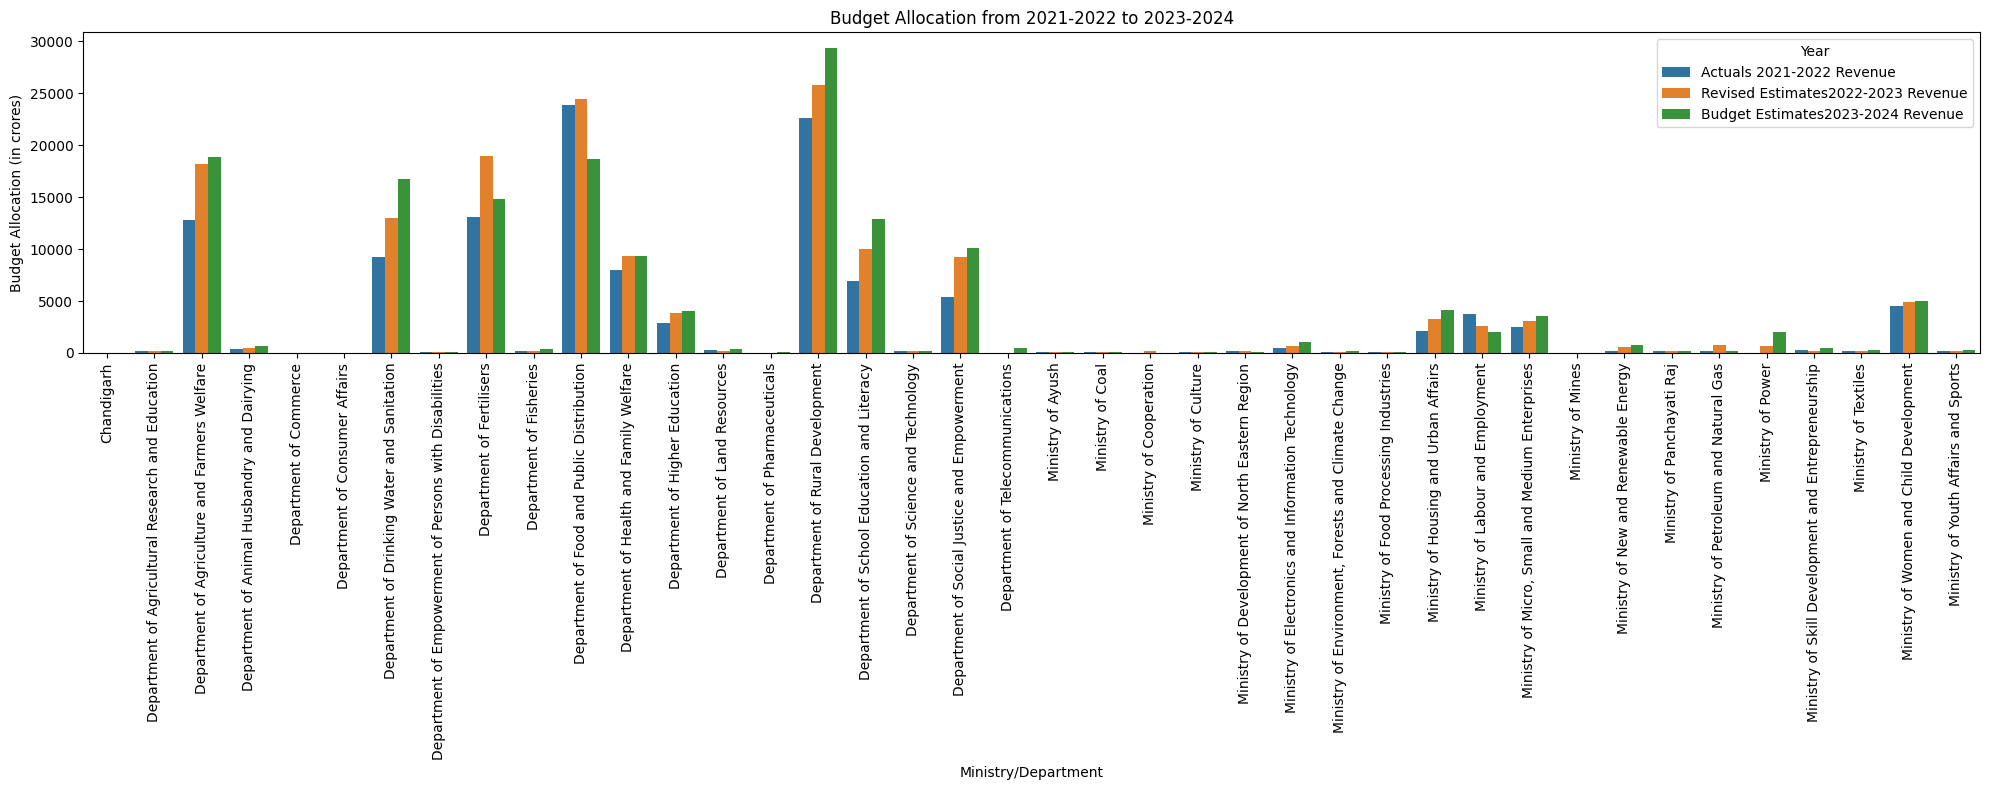

In [15]:
temp_data = ministry_data[['Ministry/Department', 'Actuals 2021-2022 Revenue', 'Revised Estimates2022-2023 Revenue', 'Budget Estimates2023-2024 Revenue']]
melted_data = pd.melt(temp_data, id_vars='Ministry/Department', value_vars=['Actuals 2021-2022 Revenue', 'Revised Estimates2022-2023 Revenue', 'Budget Estimates2023-2024 Revenue'], var_name='Year', value_name='Budget')

# Plot the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Ministry/Department', y='Budget', hue='Year', data=melted_data)
plt.xticks(rotation=90)
plt.title('Budget Allocation from 2021-2022 to 2023-2024')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation (in crores)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


* Significant increase in Revenue expenditure in **Deparment of Rural Development**, **Department of Agriculture and Farmers welfare**, **Department of Drinking water and sanitation**, **Department of School Education and Literacy**, **Ministry of Housing and Urban affairs** in the past years
* There is a decrease in Revenue expenditure in **Ministry of Labour and Employment** in the past years

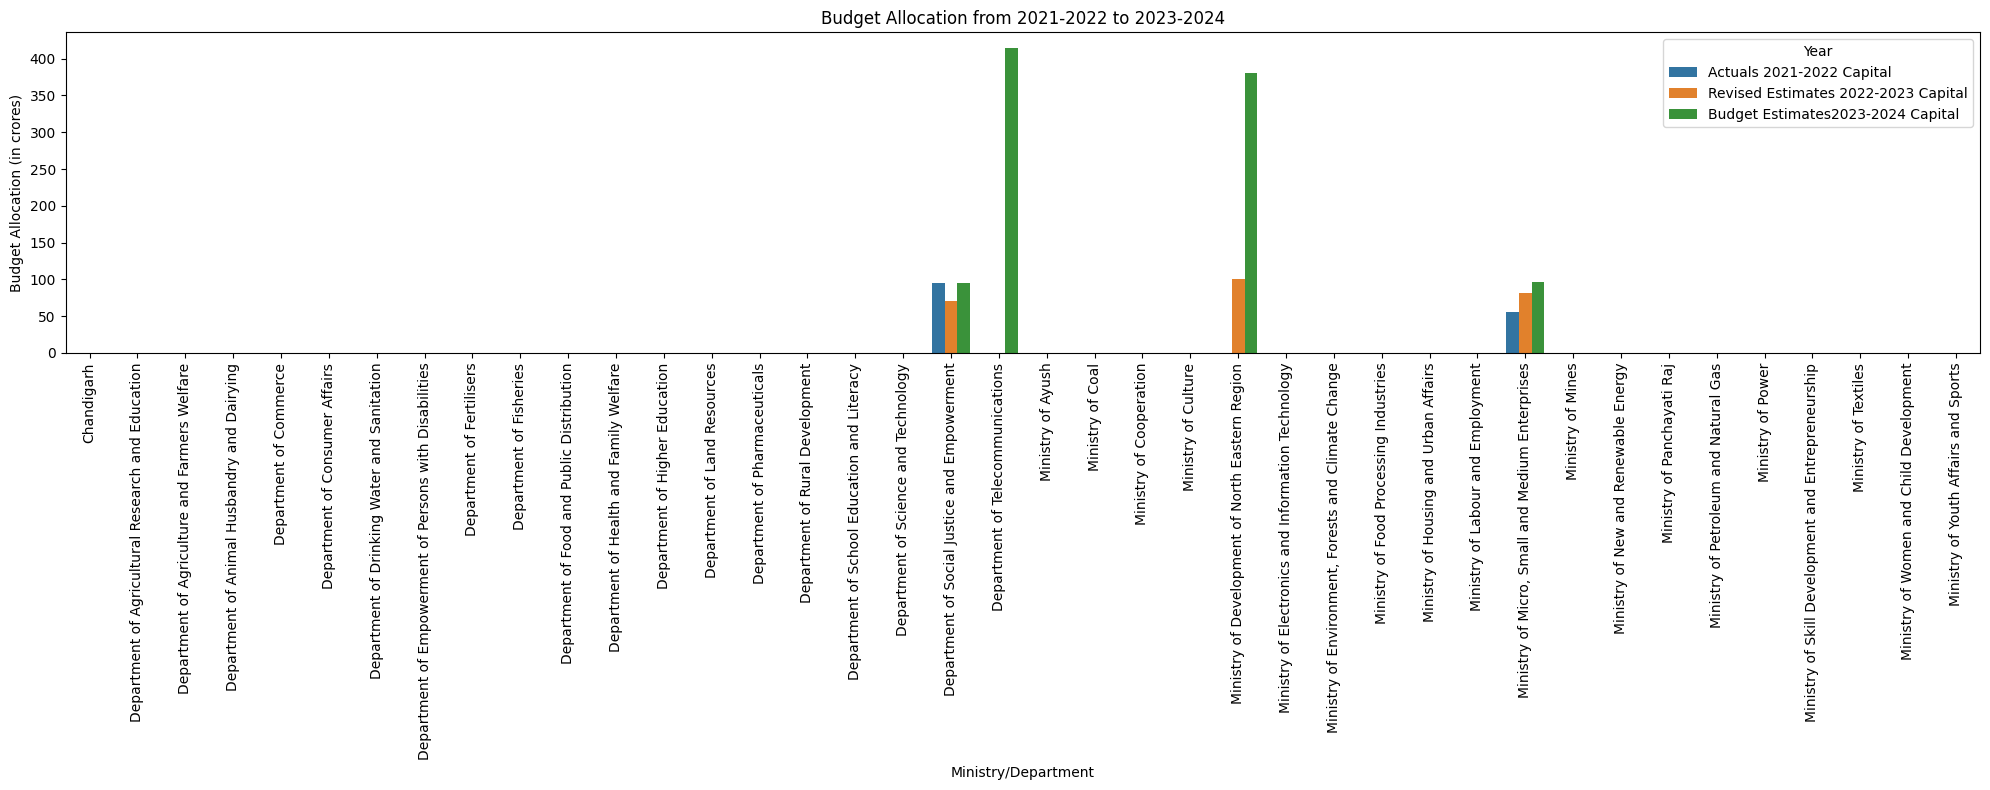

In [16]:
temp_data = ministry_data[['Ministry/Department', 'Actuals 2021-2022 Capital', 'Revised Estimates 2022-2023 Capital', 'Budget Estimates2023-2024 Capital']]
melted_data = pd.melt(temp_data, id_vars='Ministry/Department', value_vars=['Actuals 2021-2022 Capital', 'Revised Estimates 2022-2023 Capital', 'Budget Estimates2023-2024 Capital'], var_name='Year', value_name='Budget')

# Plot the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Ministry/Department', y='Budget', hue='Year', data=melted_data)
plt.xticks(rotation=90)
plt.title('Budget Allocation from 2021-2022 to 2023-2024')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation (in crores)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


* We can see a fanatic increase in capital expenditure for **North Eastern region**
* **The ministry of Micro, Small and Medium Enterprises** is increasing its capital expenditure each year

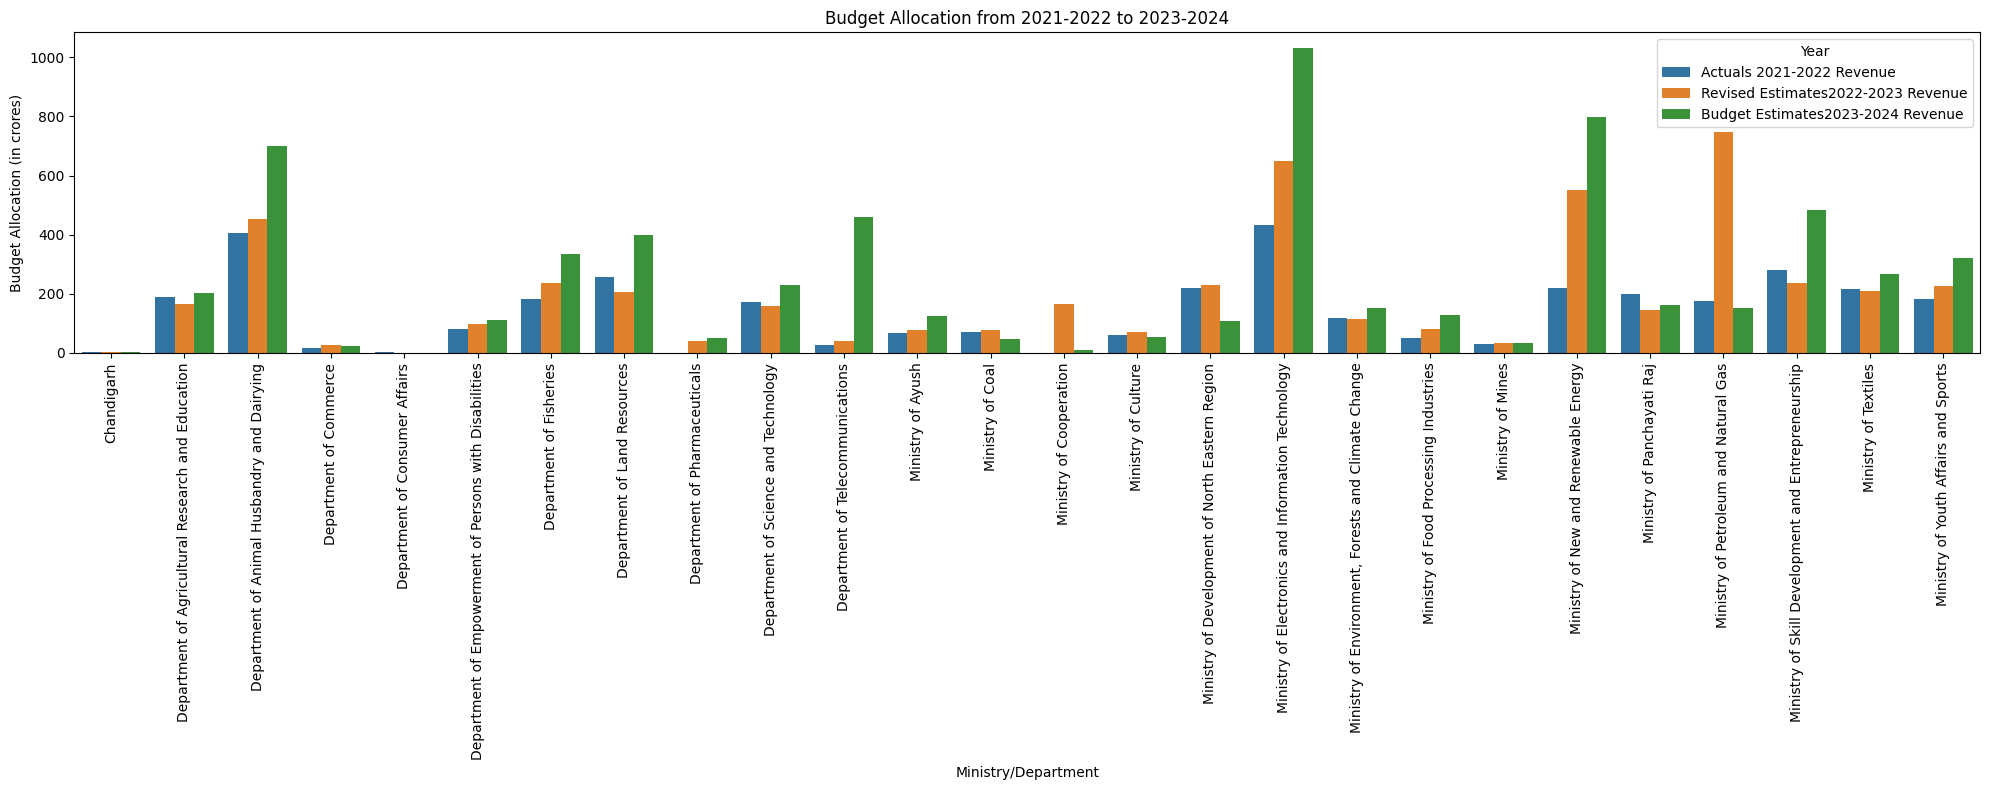

In [17]:
ministry_list = ['Department of Agriculture and Farmers Welfare', 'Department of Drinking Water and Sanitation', 'Department of Food and Public Distribution', 'Department of Fertilisers', 'Department of Higher Education', 'Department of Health and Family Welfare', 'Department of School Education and Literacy', 'Department of Social Justice and Empowerment', 'Department of Rural Development', 'Ministry of Housing and Urban Affairs', 'Ministry of Labour and Employment', 'Ministry of Micro, Small and Medium Enterprises', 'Ministry of Women and Child Development', 'Ministry of Power']
temp_data1 = ministry_data[~ministry_data['Ministry/Department'].isin(ministry_list)]

temp_data = temp_data1[['Ministry/Department', 'Actuals 2021-2022 Revenue', 'Revised Estimates2022-2023 Revenue', 'Budget Estimates2023-2024 Revenue']]
melted_data = pd.melt(temp_data, id_vars='Ministry/Department', value_vars=['Actuals 2021-2022 Revenue', 'Revised Estimates2022-2023 Revenue', 'Budget Estimates2023-2024 Revenue'], var_name='Year', value_name='Budget')

# Plot the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Ministry/Department', y='Budget', hue='Year', data=melted_data)
plt.xticks(rotation=90)
plt.title('Budget Allocation from 2021-2022 to 2023-2024')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation (in crores)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()



The budget allocation to these Department are low but there is still some insights we can gain from it
 * There is an increase in Revenue expenditure in **Department of Animal Husbandry and Dairying**, **Ministry of Electronics and Information Technology**, **Ministry of New and Renewable Energy**, and **Ministry of Skill Development and Entrepreneurship**. in the past years.
 * There is a reduction in Revenue Expenditure **Ministry of Coal** and **Ministry of Development of North Eastern Region** in past years.

 * The Revenure Expenditure of **Ministry of Development of North Eastern Region** is decreasing but the Capital Expenditure on this Ministry is Increasing significantly.

In [21]:
ministry_data.drop(['Scheme', 'Ministry/Department'], axis=1).corr()

Actuals 2021-2022 Revenue  \
Actuals 2021-2022 Revenue                             1.000000   
Actuals 2021-2022 Capital                             0.049912   
Actuals 2021-2022 Total                               0.999996   
Budget Estimates 2022-2023 Revenue                    0.939369   
Budget Estimates 2022-2023 Capital                    0.050500   
Budget Estimates 2022-2023 Total                      0.939077   
Revised Estimates2022-2023 Revenue                    0.985160   
Revised Estimates 2022-2023 Capital                  -0.031160   
Revised Estimates2022-2023 Total                      0.985072   
Budget Estimates2023-2024 Revenue                     0.948808   
Budget Estimates2023-2024 Capital                    -0.105626   
Budget Estimates2023-2024 Total                       0.948567   

                                     Actuals 2021-2022 Capital  \
Actuals 2021-2022 Revenue                             0.049912   
Actuals 2021-2022 Capital                             1.000000   
Actuals 2021-2022 Total                               0.052847   
Budget Estimates 2022-2023 Revenue                    0.126014   
Budget Estimates 2022-2023 Capital                    0.999913   
Budget Estimates 2022-2023 Total                      0.130073   
Revised Estimates2022-2023 Revenue                    0.102375   
Revised Estimates 2022-2023 Capital                   0.674080   
Revised Estimates2022-2023 Total                      0.104575   
Budget Estimates2023-2024 Revenue                     0.119774   
Budget Estimates2023-2024 Capital                     0.177569   
Budget Estimates2023-2024 Total                       0.122198   

                                     Actuals 2021-2022 Total  \
Actuals 2021-2022 Revenue                           0.999996   
Actuals 2021-2022 Capital                           0.052847   
Actuals 2021-2022 Total                             1.000000   
Budget Estimates 2022-2023 Revenue                  0.939598   
Budget Estimates 2022-2023 Capital                  0.053435   
Budget Estimates 2022-2023 Total                    0.939318   
Revised Estimates2022-2023 Revenue                  0.985312   
Revised Estimates 2022-2023 Capital                -0.029172   
Revised Estimates2022-2023 Total                    0.985231   
Budget Estimates2023-2024 Revenue                   0.949017   
Budget Estimates2023-2024 Capital                  -0.105087   
Budget Estimates2023-2024 Total                     0.948783   

                                     Budget Estimates 2022-2023 Revenue  \
Actuals 2021-2022 Revenue                                      0.939369   
Actuals 2021-2022 Capital                                      0.126014   
Actuals 2021-2022 Total                                        0.939598   
Budget Estimates 2022-2023 Revenue                             1.000000   
Budget Estimates 2022-2023 Capital                             0.127050   
Budget Estimates 2022-2023 Total                               0.999992   
Revised Estimates2022-2023 Revenue                             0.959856   
Revised Estimates 2022-2023 Capital                            0.008332   
Revised Estimates2022-2023 Total                               0.959897   
Budget Estimates2023-2024 Revenue                              0.986923   
Budget Estimates2023-2024 Capital                             -0.100227   
Budget Estimates2023-2024 Total                                0.986796   

                                     Budget Estimates 2022-2023 Capital  \
Actuals 2021-2022 Revenue                                      0.050500   
Actuals 2021-2022 Capital                                      0.999913   
Actuals 2021-2022 Total                                        0.053435   
Budget Estimates 2022-2023 Revenue                             0.127050   
Budget Estimates 2022-2023 Capital                             1.000000   
Budget Estimates 2022-2023 Total                            

<Axes: >

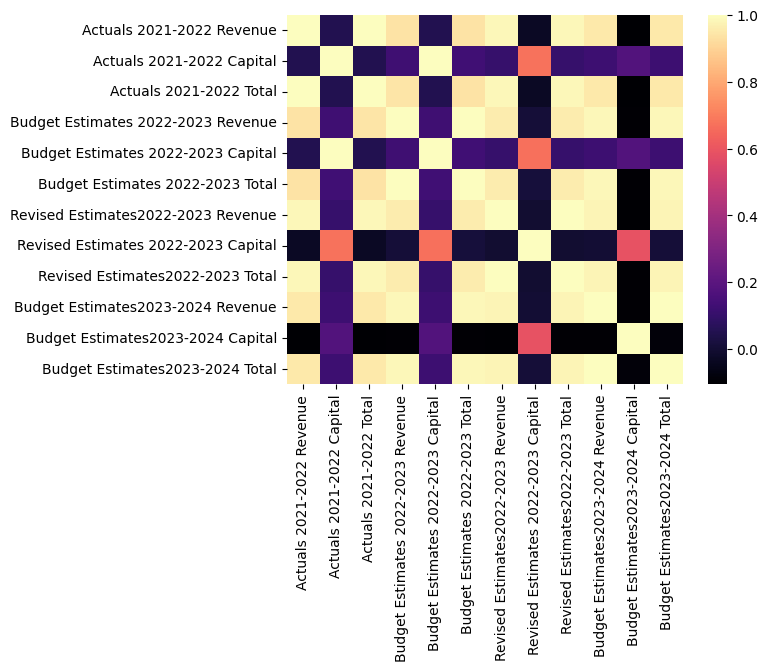

In [22]:
sns.heatmap(data=ministry_data.drop(['Scheme', 'Ministry/Department'], axis=1).corr(), cmap='magma')

In [28]:
ministry_data['Revenue Change 21-22 to 22-23'] = ((ministry_data['Revised Estimates2022-2023 Revenue'] - ministry_data['Actuals 2021-2022 Revenue']) / ministry_data['Actuals 2021-2022 Revenue']) * 100
ministry_data['Capital Change 21-22 to 22-23'] = ((ministry_data['Revised Estimates 2022-2023 Capital'] - ministry_data['Actuals 2021-2022 Capital']) / ministry_data['Actuals 2021-2022 Capital']) * 100
ministry_data['Revenue Change 22-23 to 23-24'] = ((ministry_data['Budget Estimates2023-2024 Revenue'] - ministry_data['Revised Estimates2022-2023 Revenue']) / ministry_data['Revised Estimates2022-2023 Revenue']) * 100
ministry_data['Capital Change 22-23 to 23-24'] = ((ministry_data['Budget Estimates2023-2024 Capital'] - ministry_data['Revised Estimates 2022-2023 Capital']) / ministry_data['Revised Estimates 2022-2023 Capital']) * 100

# Replace infinite and NaN values with 0 for better presentation
ministry_data.replace([float('inf'), -float('inf'), pd.NA], 0, inplace=True)

# Select and rename columns for presentation
percentage_change_columns = ['Ministry/Department', 'Revenue Change 21-22 to 22-23', 'Capital Change 21-22 to 22-23', 'Revenue Change 22-23 to 23-24', 'Capital Change 22-23 to 23-24']
percentage_change_data = ministry_data[percentage_change_columns]
percentage_change_data.rename(columns={
    'Revenue Change 21-22 to 22-23': 'Revenue % Change (21-22 to 22-23)',
    'Capital Change 21-22 to 22-23': 'Capital % Change (21-22 to 22-23)',
    'Revenue Change 22-23 to 23-24': 'Revenue % Change (22-23 to 23-24)',
    'Capital Change 22-23 to 23-24': 'Capital % Change (22-23 to 23-24)'
}, inplace=True)

# Display the data in a presentable format
with pd.option_context('display.float_format', '{:.2f}%'.format):
    display(percentage_change_data)


Ministry/Department  \
0                                          Chandigarh   
1   Department of Agricultural Research and Education   
2       Department of Agriculture and Farmers Welfare   
3         Department of Animal Husbandry and Dairying   
4                              Department of Commerce   
5                      Department of Consumer Affairs   
6         Department of Drinking Water and Sanitation   
7   Department of Empowerment of Persons with Disa...   
8                           Department of Fertilisers   
9                             Department of Fisheries   
10         Department of Food and Public Distribution   
11            Department of Health and Family Welfare   
12                     Department of Higher Education   
13                       Department of Land Resources   
14                      Department of Pharmaceuticals   
15                    Department of Rural Development   
16        Department of School Education and Literacy   
17               Department of Science and Technology   
18       Department of Social Justice and Empowerment   
19                   Department of Telecommunications   
20                                  Ministry of Ayush   
21                                   Ministry of Coal   
22                            Ministry of Cooperation   
23                                Ministry of Culture   
24    Ministry of Development of North Eastern Region   
25  Ministry of Electronics and Information Techno...   
26  Ministry of Environment, Forests and Climate C...   
27             Ministry of Food Processing Industries   
28              Ministry of Housing and Urban Affairs   
29                  Ministry of Labour and Employment   
30    Ministry of Micro, Small and Medium Enterprises   
31                                  Ministry of Mines   
32               Ministry of New and Renewable Energy   
33                         Ministry of Panchayati Raj   
34              Ministry of Petroleum and Natural Gas   
35                                  Ministry of Power   
36  Ministry of Skill Development and Entrepreneur...   
37                               Ministry of Textiles   
38            Ministry of Women and Child Development   
39               Ministry of Youth Affairs and Sports   

    Revenue % Change (21-22 to 22-23)  Capital % Change (21-22 to 22-23)  \
0                              34.29%                                NaN   
1                             -12.79%                                NaN   
2                              42.03%                                NaN   
3                              11.56%                                NaN   
4                              43.18%                                NaN   
5                             -39.83%                                NaN   
6                              40.45%                                NaN   
7                              17.39%                                NaN   
8                              44.84%                                NaN   
9                              30.57%                                NaN   
10                              2.42%                                NaN   
11                             16.13%                                NaN   
12                             33.08%                                NaN   
13                            -19.73%                                NaN   
14                              0.00%                                NaN   
15                             14.28%                                NaN   
16                             43.87%                                NaN   
17                             -7.80%                                NaN   
18                             70.72%                            -26.29%   
19                             53.53%                                NaN   
20                             11.58%                                NaN   
21                      

 **Revenue (21-22 to 22-23)**
* Department of Social Justice and Empowerment	  70.72%    
* Ministry of Petroleum and Natural Gas	          321.98%   
* Ministry of New and Renewable Energy	          149.72%   
* Ministry of Labour and Employment	             -32.55%	

 **Revenue (22-23 to 23-24)**
* Department of Telecommunications	              1010.00%	
* Ministry of Skill Development and Entrepren...  105.53%	
* Department of Land Resources	                   93.40%   
* Ministry of Power	                              200.83%	
* Ministry of Petroleum and Natural Gas	          -79.86%	
* Ministry of Cooperation	                      -94.45%

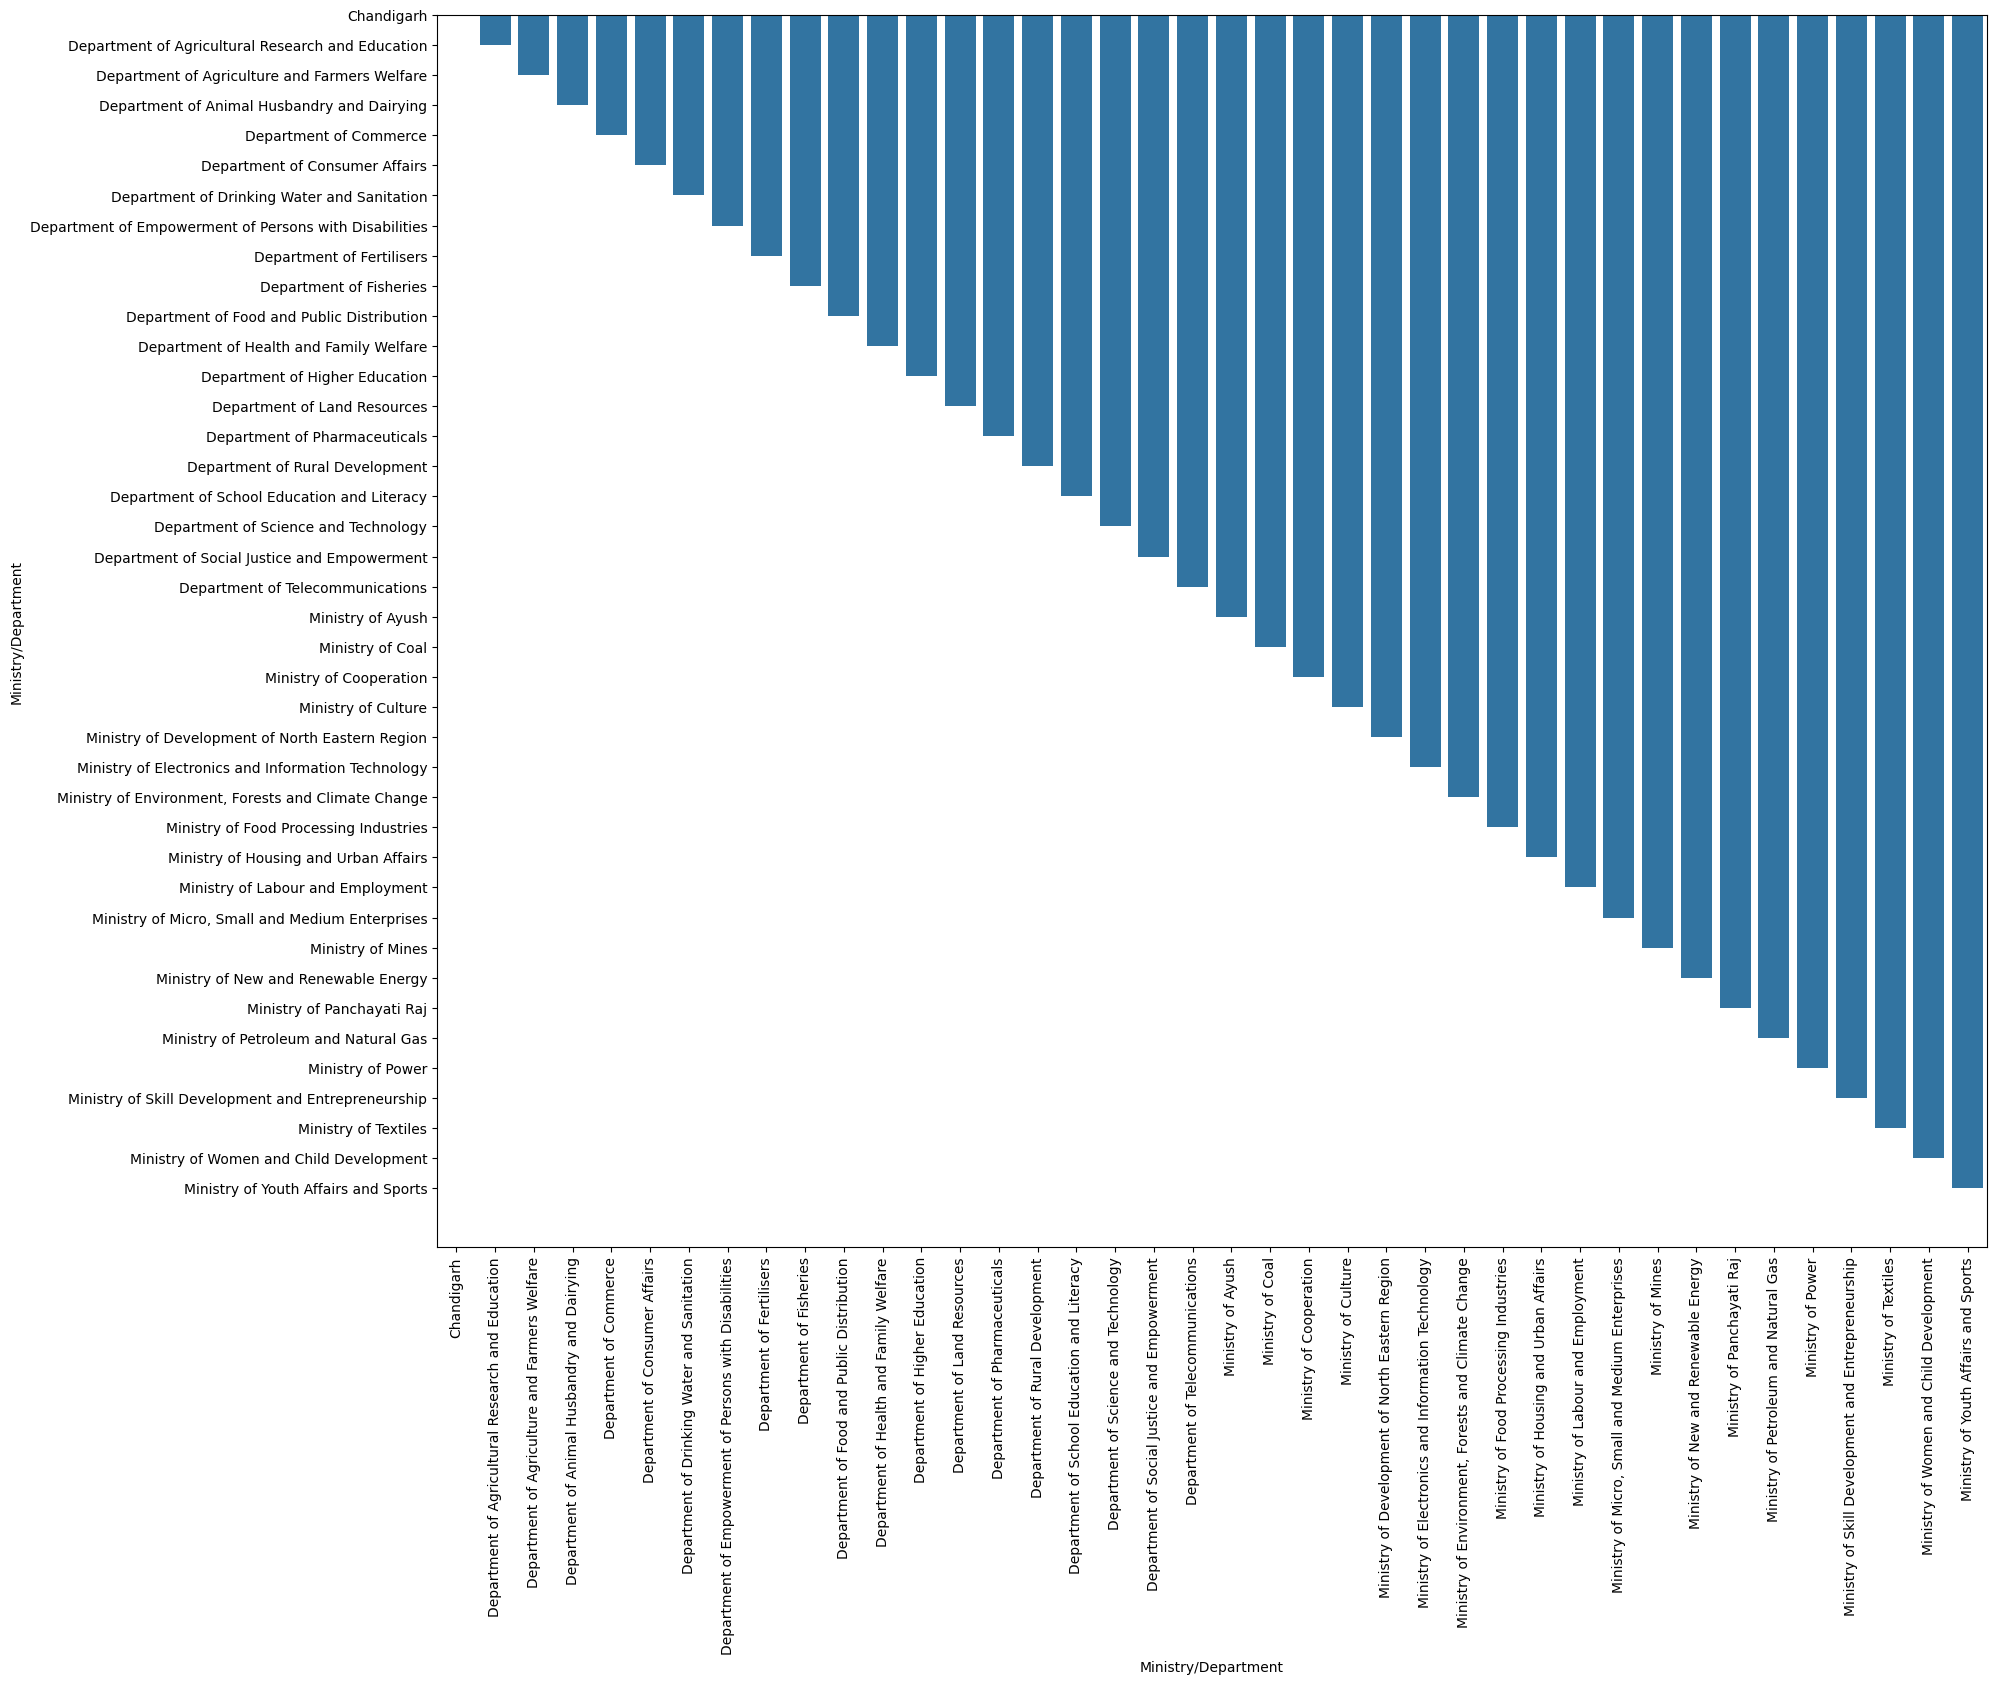

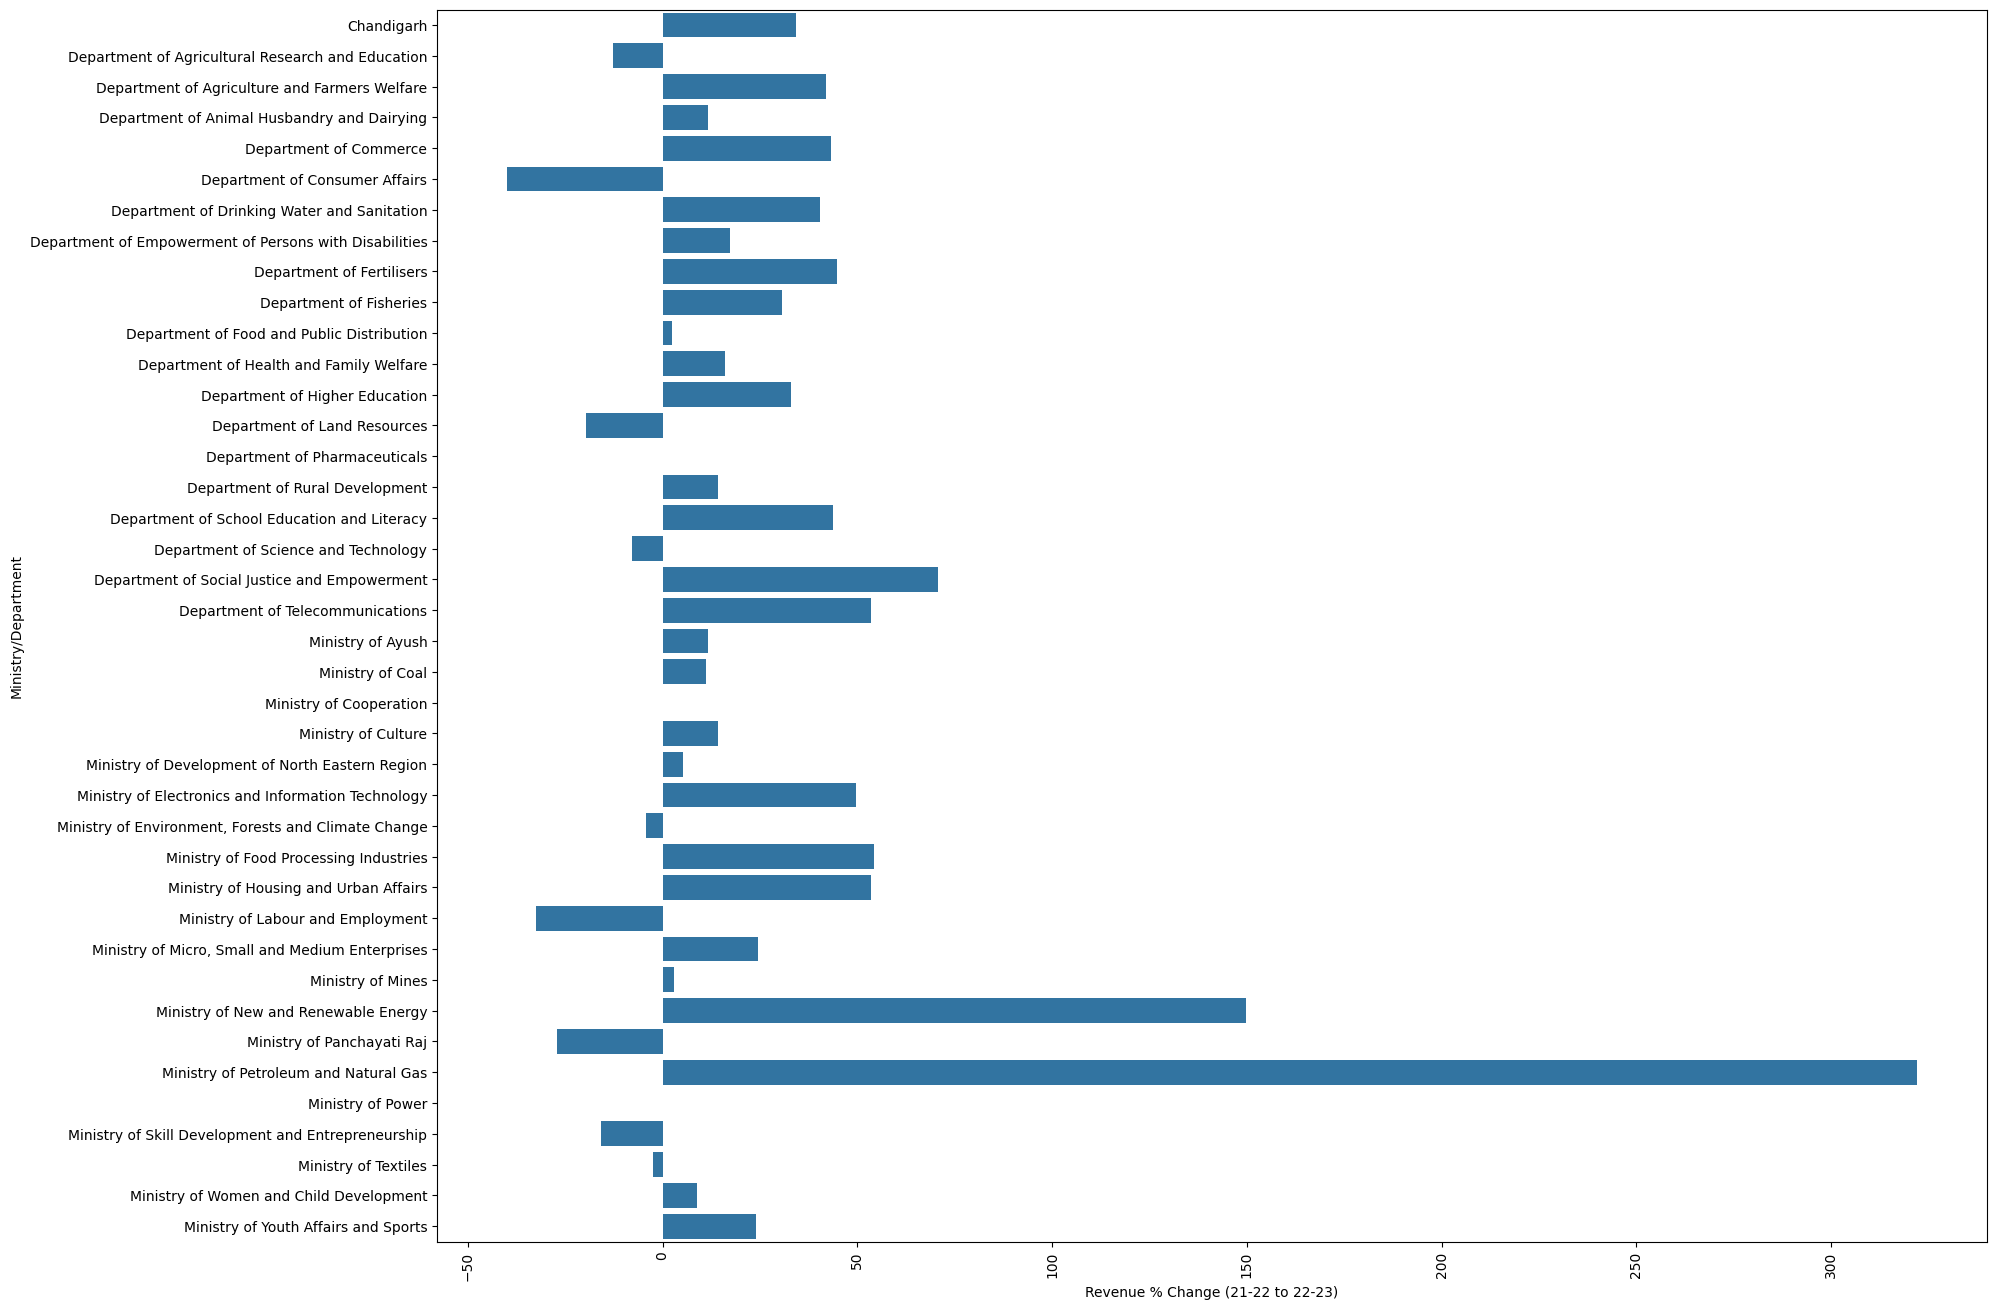

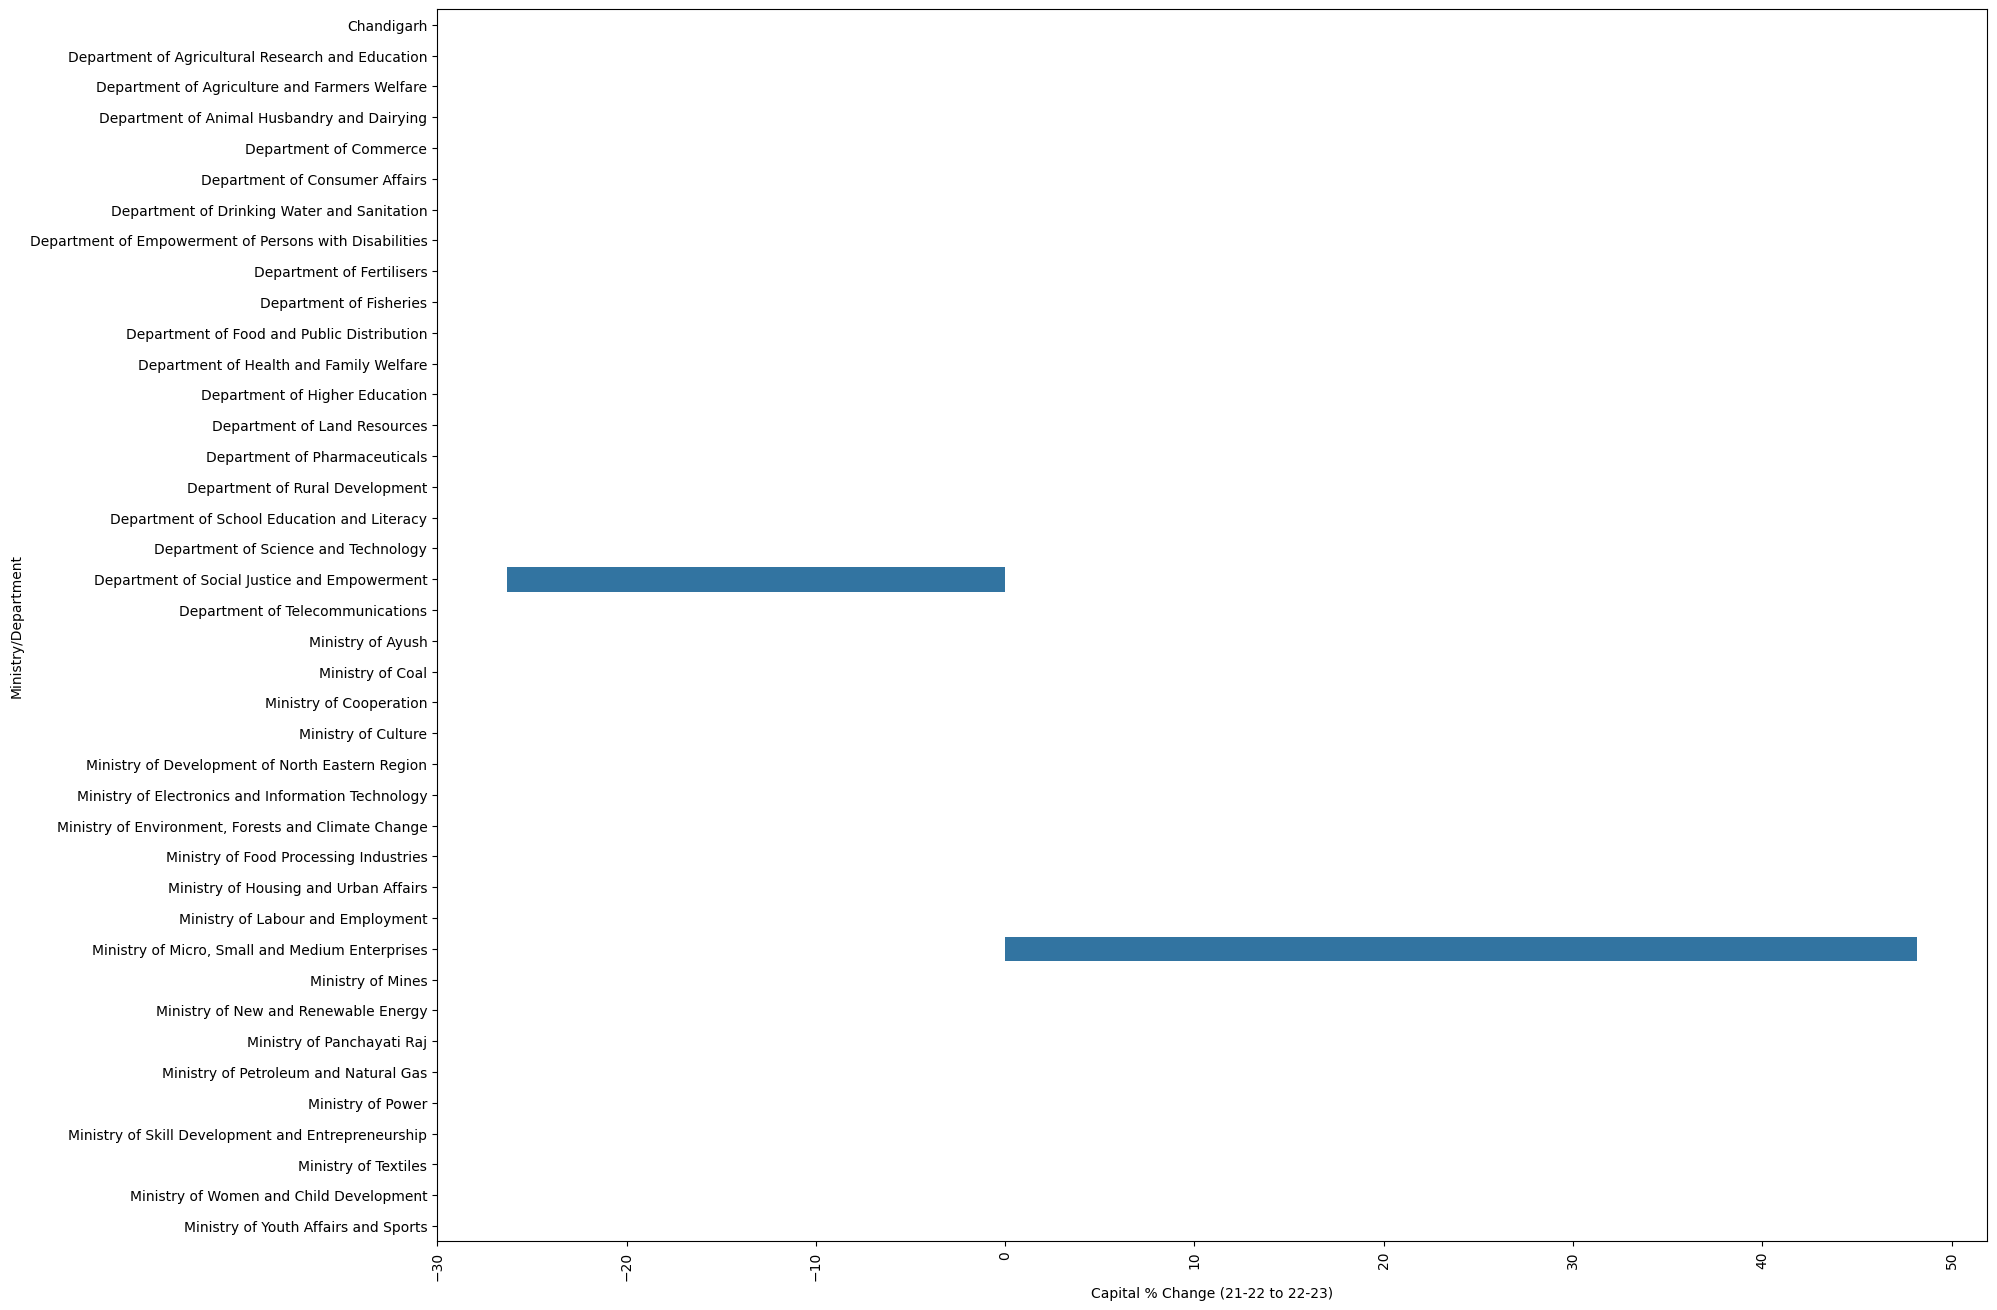

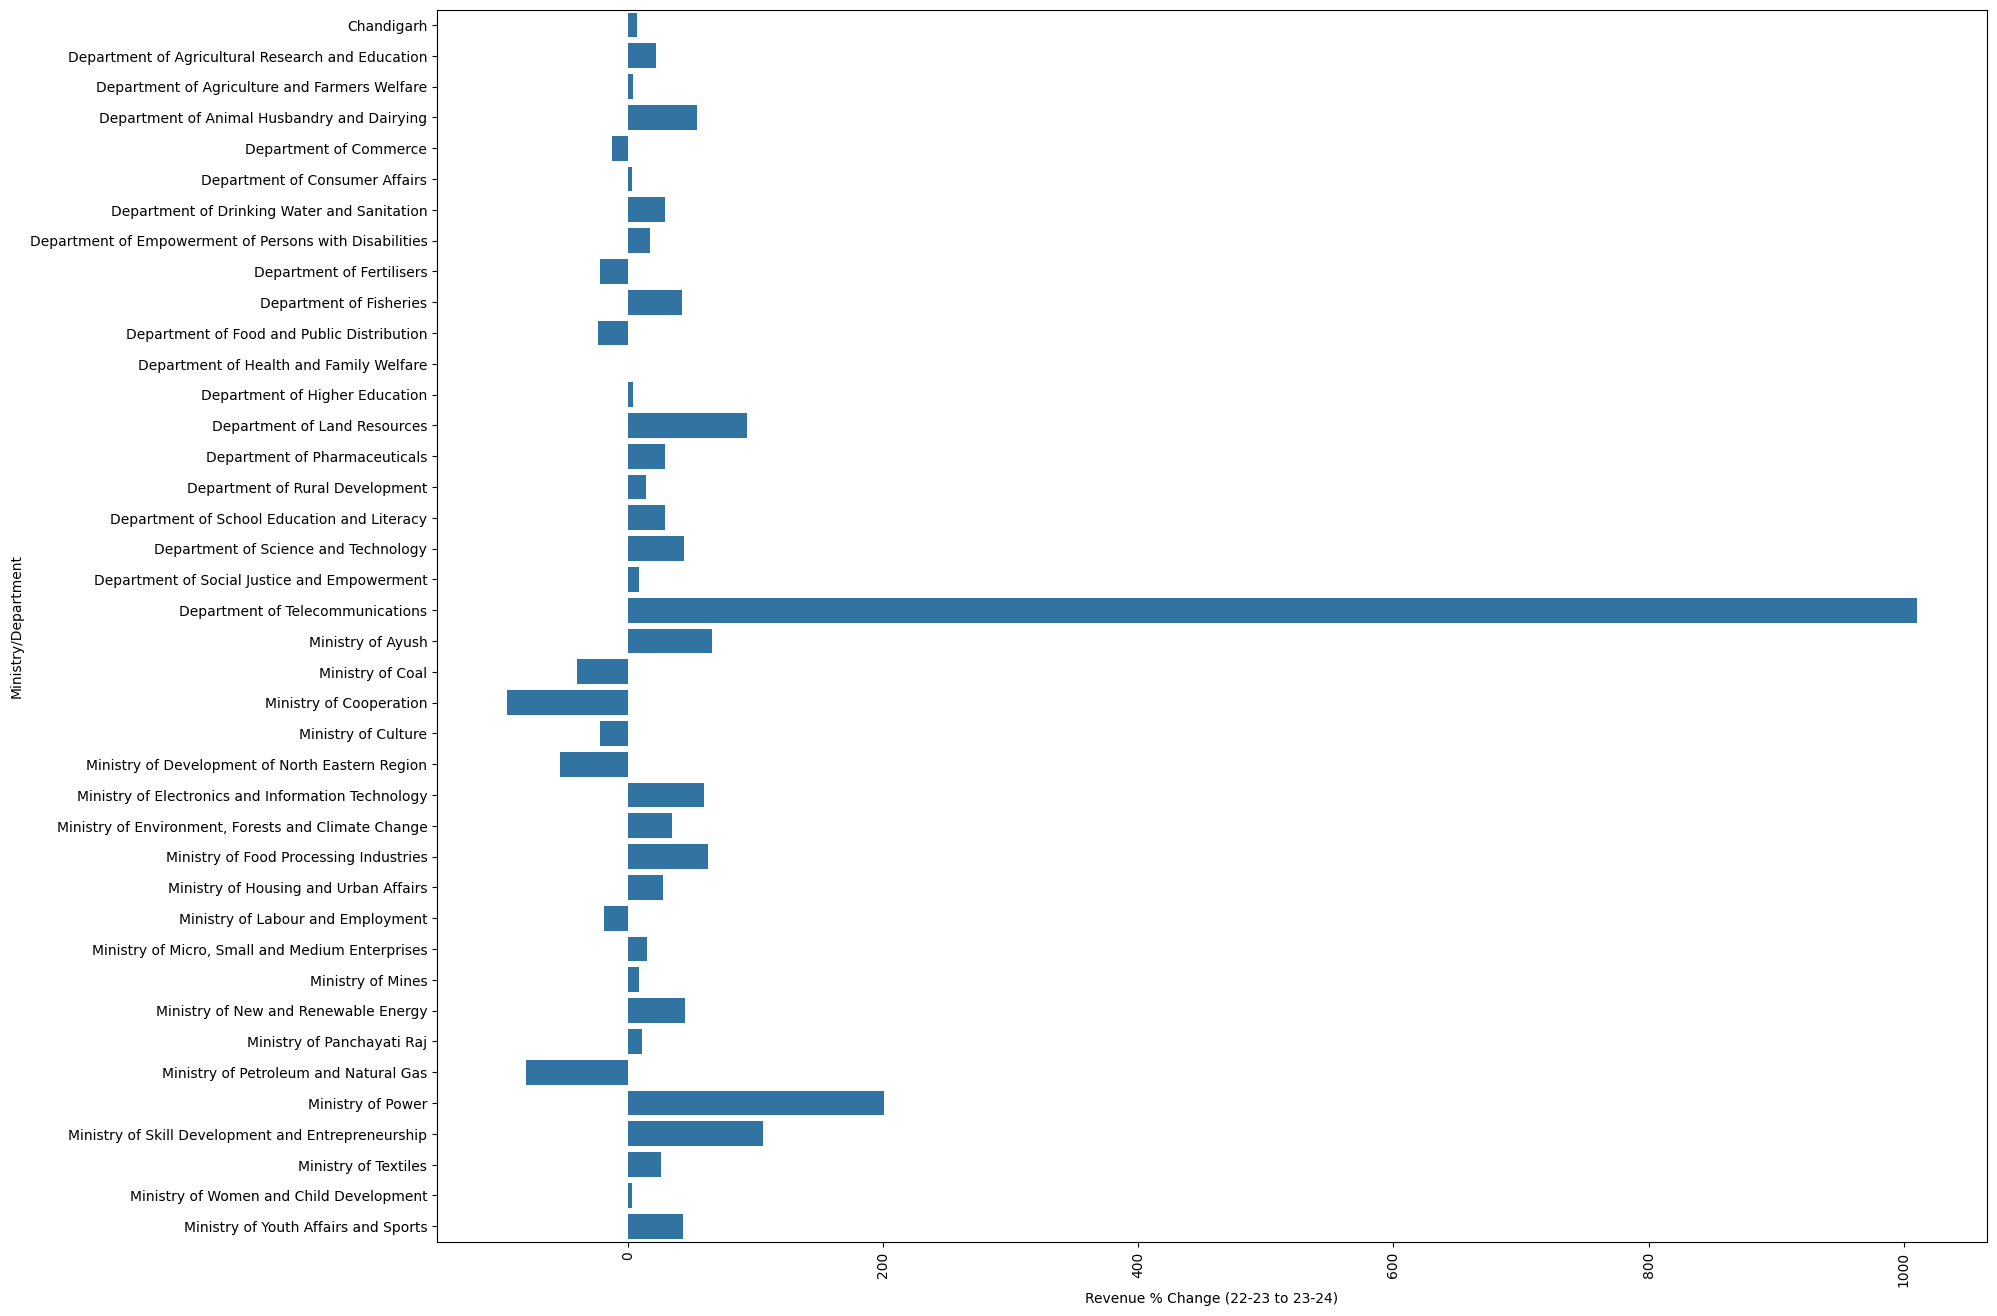

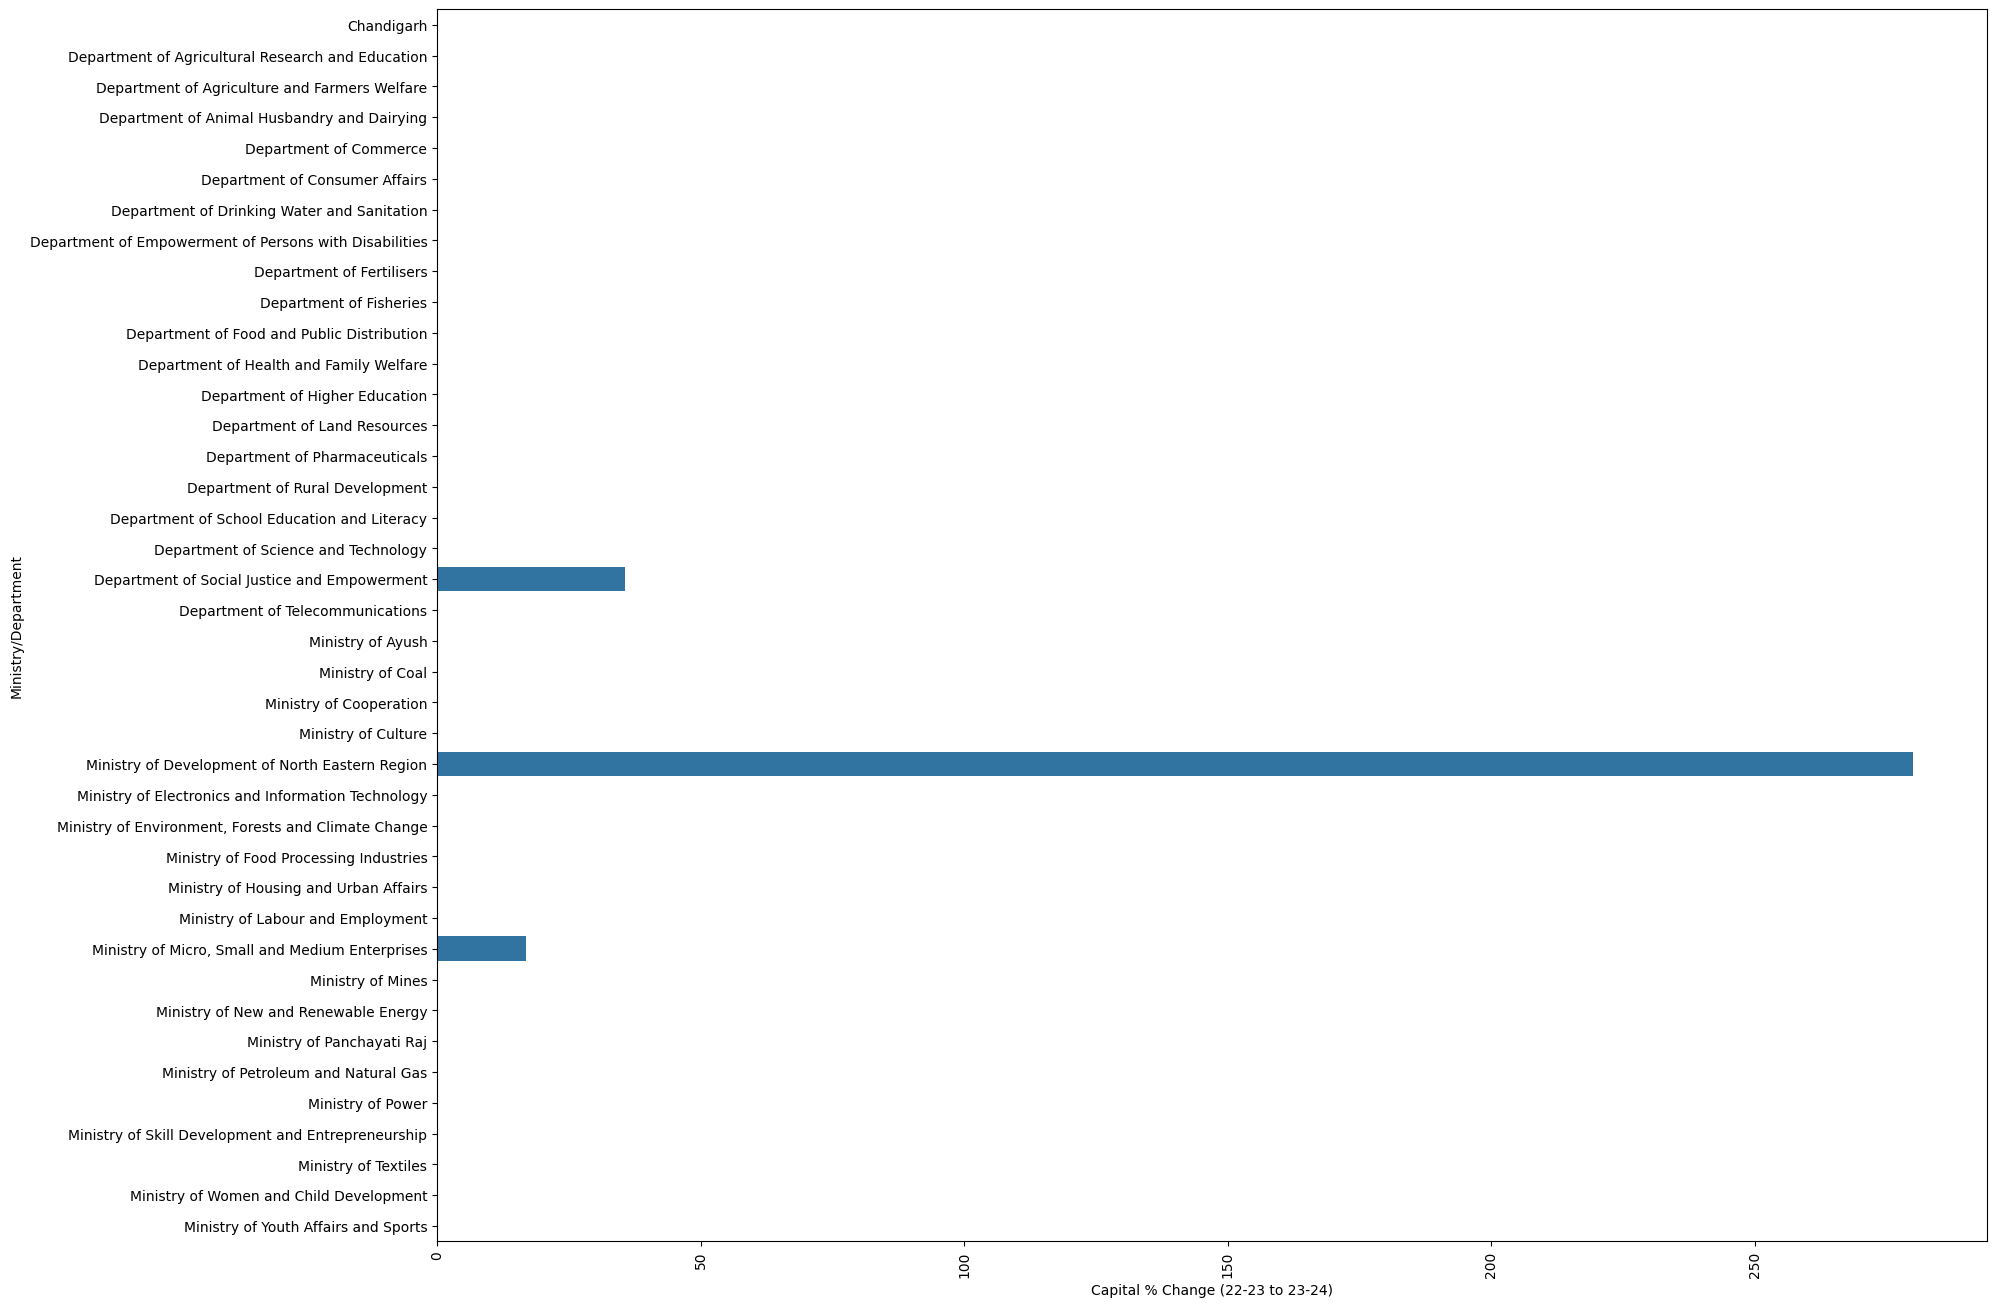

In [30]:
for index, column_name in enumerate(percentage_change_data.columns):
    plt.figure(figsize=(20,16))
    sns.barplot(x=percentage_change_data[column_name], y=ministry_data['Ministry/Department'])
    plt.xticks(rotation=90)


# Conclusion

* The Govt. has done the most expenditure on welfare of people and for farmers
* The capital expenditure was mainly for Development in North Eastern Region, telecommunications , Social Empowerment and Micro,small and medium Enterprises.
* The revenue expenditure on Natural sources of Energy is increased greatly
* There was a constant decline in revenue for Labour and Employment but an increase in Ministry of Skill development and Entrepreneurship.
* Ministry of Cooperation saw a great decline in budget from no increase to 94% decrease in past years.


---

1. **Top Revenue Expenditures (2021-2022)**:
   - The highest revenue expenditures in 2021-2022 were from the Department of Rural Development, Department of Food and Public Distribution, Department of Fertilizers, and Department of Agriculture and Farmers Welfare.

2. **Capital Expenditures (2021-2022)**:
   - Capital expenditures were applicable only in the Department of Social Justice and Empowerment and the Ministry of Micro, Small and Medium Enterprises.

3. **Top Estimated Revenue Expenditures (2022-2023)**:
   - In 2022-2023, the top estimated revenue expenditures remained consistent, including the Department of Rural Development, Department of Food and Public Distribution, Department of Drinking Water and Sanitation, and Department of Agriculture and Farmers Welfare.

4. **Revised Capital Expenditures (2022-2023)**:
   - The revised capital expenditures in 2022-2023 also included the Ministry of Development of North Eastern Region.

5. **Massive Increase in Capital Expenditures (2023-2024)**:
   - In 2023-2024, there was a significant increase in capital expenditures for the Ministry of Development of North Eastern Region and the Department of Telecommunications.

6. **Revenue Trends**:
   - Notable increases in revenue expenditure occurred in the Department of Rural Development, Department of Agriculture and Farmers Welfare, Department of Drinking Water and Sanitation, Department of School Education and Literacy, and Ministry of Housing and Urban Affairs.
   - Revenue expenditure decreased in the Ministry of Labour and Employment.

7. **Capital Trends**:
   - Capital expenditure saw a remarkable increase in the North Eastern region.
   - The Ministry of Micro, Small and Medium Enterprises consistently increased its capital expenditure each year.

8. **Insights from Low Budget Allocations**:
   - Despite low budget allocations, there are still valuable insights to be gained from departments with limited resources.

9. **Specific Department Trends**:
   - Increases in revenue expenditure were observed in the Department of Animal Husbandry and Dairying, Ministry of Electronics and Information Technology, Ministry of New and Renewable Energy, and Ministry of Skill Development and Entrepreneurship.
   - Reductions in revenue expenditure occurred in the Ministry of Coal and the Ministry of Development of North Eastern Region.
   - The Ministry of Development of North Eastern Region showed decreasing revenue expenditure but significant growth in capital expenditure.

10. **Notable Revenue Changes (21-22 to 22-23)**:
    - Department of Social Justice and Empowerment: +70.72%
    - Ministry of Petroleum and Natural Gas: +321.98%
    - Ministry of New and Renewable Energy: +149.72%
    - Ministry of Labour and Employment: -32.55%

11. **Notable Revenue Changes (22-23 to 23-24)**:
    - Department of Telecommunications: +1010.00%
    - Ministry of Skill Development and Entrepreneurship: +105.53%
    - Department of Land Resources: +93.40%
    - Ministry of Power: +200.83%
    - Ministry of Petroleum and Natural Gas: -79.86%
    - Ministry of Cooperation: -94.45�